<font size="4"> <b> • DOMAIN: </b>Telecom</font>

<font size="4"> <b> • CONTEXT: </b>A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

<font size="4"> <b> • DATA DESCRIPTION: </b>Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
    
• Customers who left within the last month – the column is called Churn
    
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies
    
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges
    
• Demographic info about customers – gender, age range, and if they have partners and dependents

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.
    
<b> Steps to the project: </b>
    
1. Import and warehouse data: 
    
>Import all the given datasets. Explore shape and size.
    
>Merge all datasets onto one and explore final shape and size
    
2. Data cleansing: 
    
>Missing value treatment
    
>Convert categorical attributes to continuous using relevant functional knowledge
    
>Drop attribute/s if required using relevant functional knowledge
    
>Automate all the above steps
    
3. Data analysis & visualisation: 
    
>Perform detailed statistical analysis on the data.
    
>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
    
4. Data pre-processing:
    
>Segregate predictors vs target attributes
    
>Check for target balancing and fix it if found imbalanced.
    
>Perform train-test split.
    
>Check if the train and test data have similar statistical characteristics when compared with original data.
    
5. Model training, testing and tuning: 
    
>Train and test all ensemble models taught in the learning module.
    
>Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
    
>Display the classification accuracies for train and test data.
    
>Apply all the possible tuning techniques to train the best model for the given data.
    
>Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    
>Display and compare all the models designed with their train and test accuracies.
    
>Select the final best trained model along with your detailed comments for selecting this model.
    
>Pickle the selected model for future use.
    
6. Conclusion and improvisation: 
    
>Write your conclusion on the results.
    
>Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.

</font>
 

### Answer: 

<font size="5"><p style="color:black"> <b> 1. Import and warehouse data:</p></font>

In [1]:
# importing functions

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets. Explore shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 MySQL Table Loading code

### Telecom_churn_1


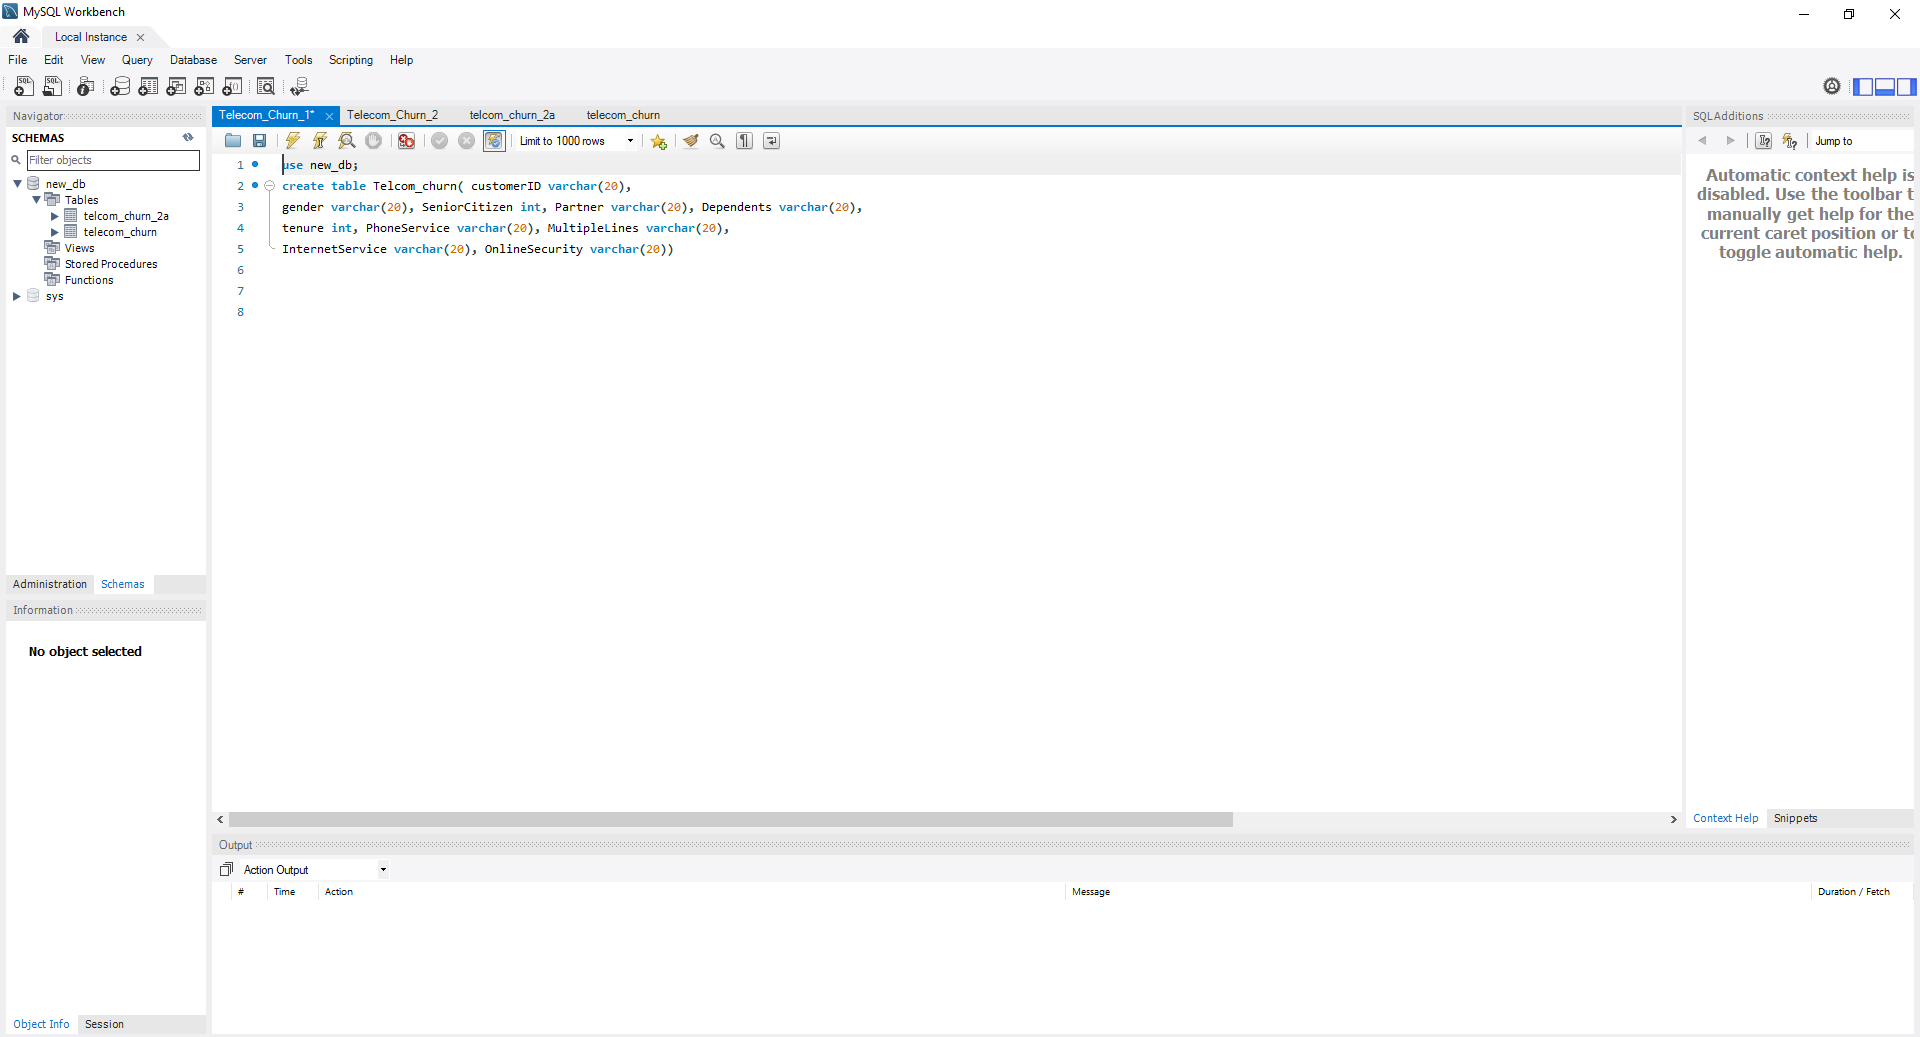


use new_db;

create table Telcom_churn( customerID varchar(20), 
gender varchar(20), SeniorCitizen int, Partner varchar(20), Dependents varchar(20), 
tenure int, PhoneService varchar(20), MultipleLines varchar(20), 
InternetService varchar(20), OnlineSecurity varchar(20))

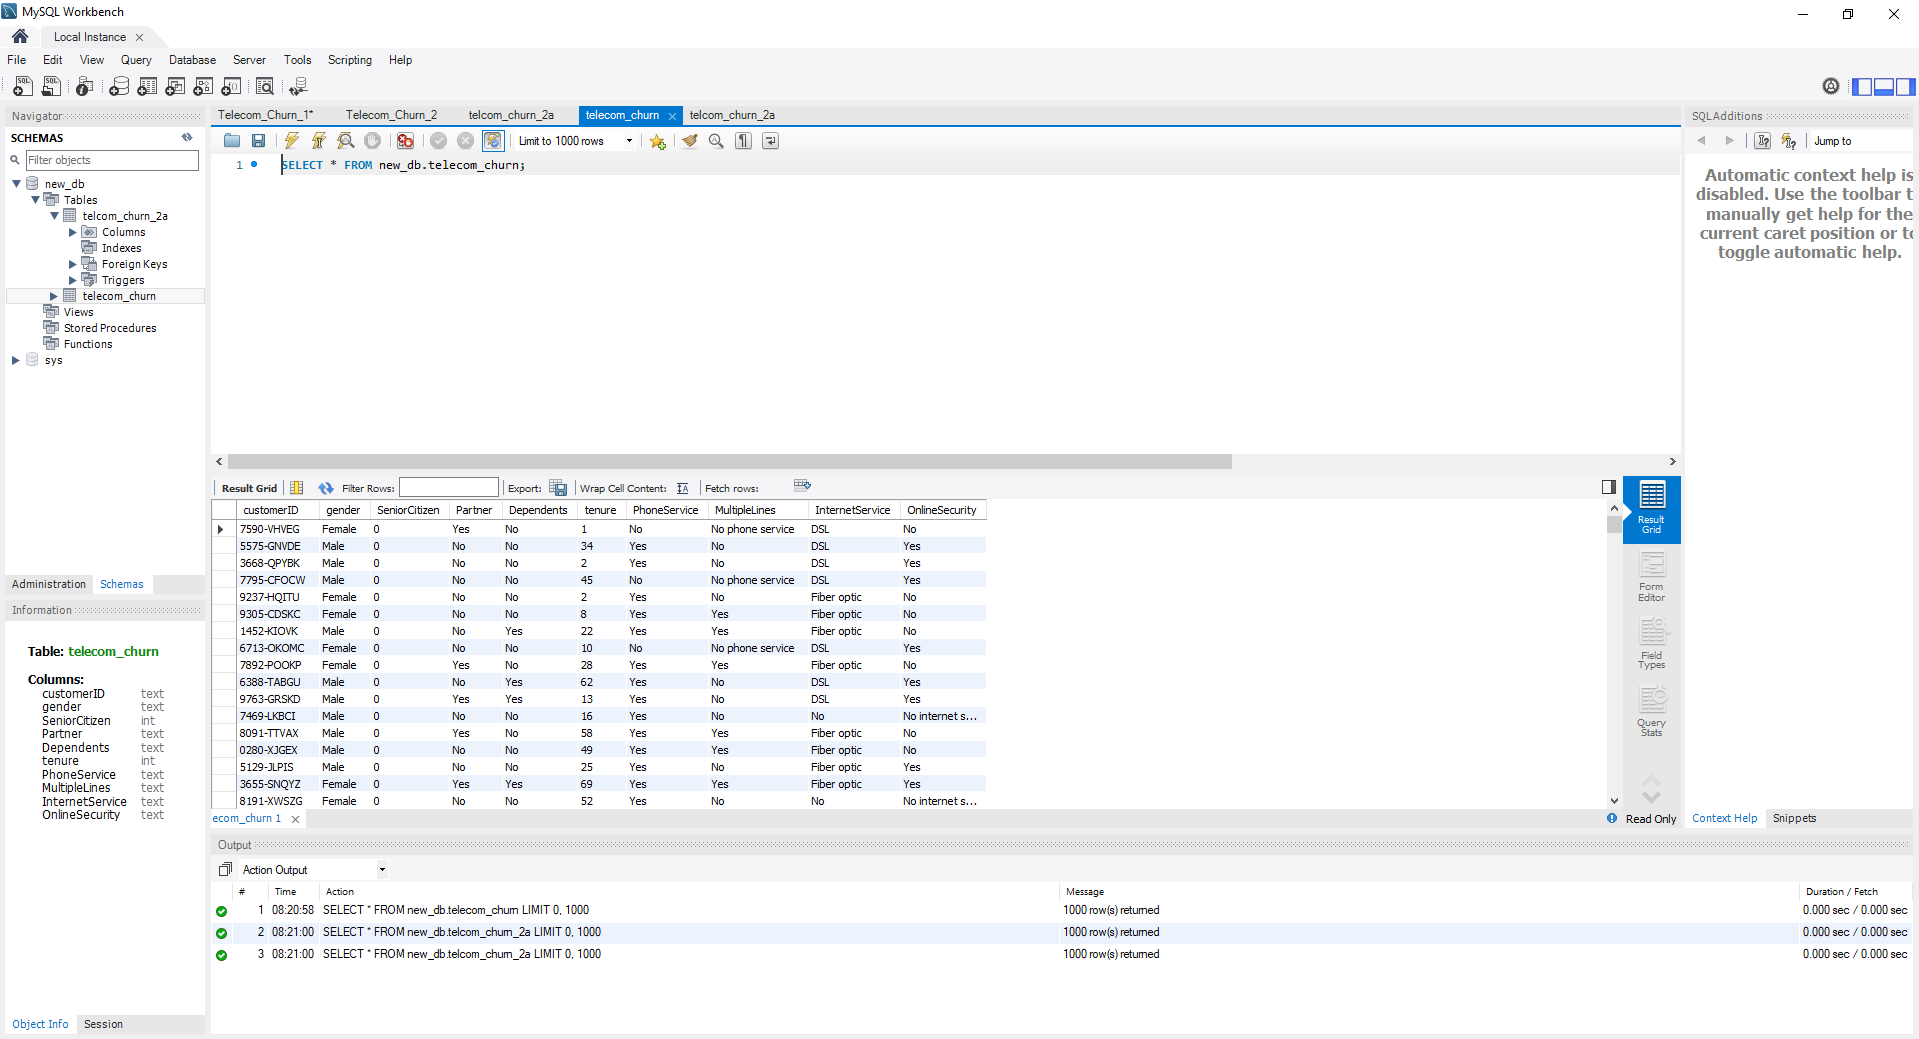

### Telcom_churn_2a

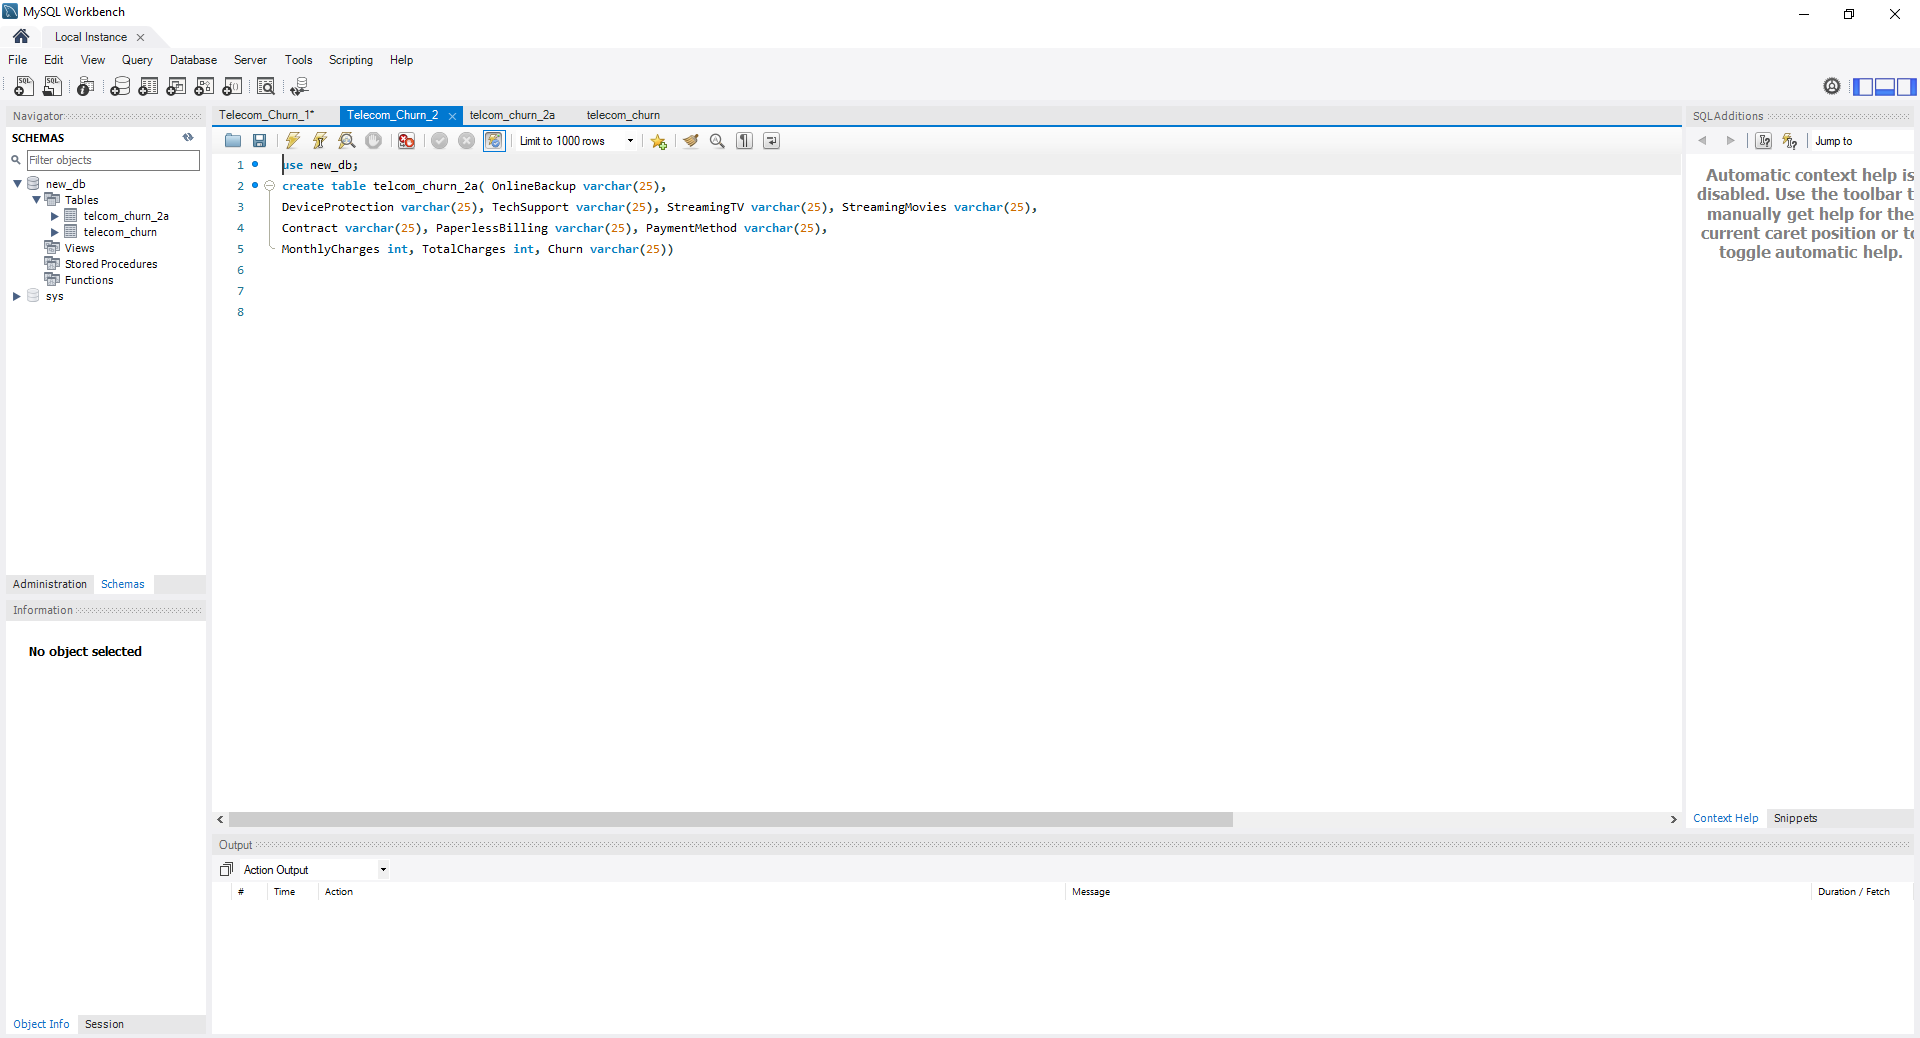

use new_db;

create table telcom_churn_2a( OnlineBackup varchar(25), 
DeviceProtection varchar(25), TechSupport varchar(25), StreamingTV varchar(25), StreamingMovies varchar(25), 
Contract varchar(25), PaperlessBilling varchar(25), PaymentMethod varchar(25), 
MonthlyCharges int, TotalCharges int, Churn varchar(25))


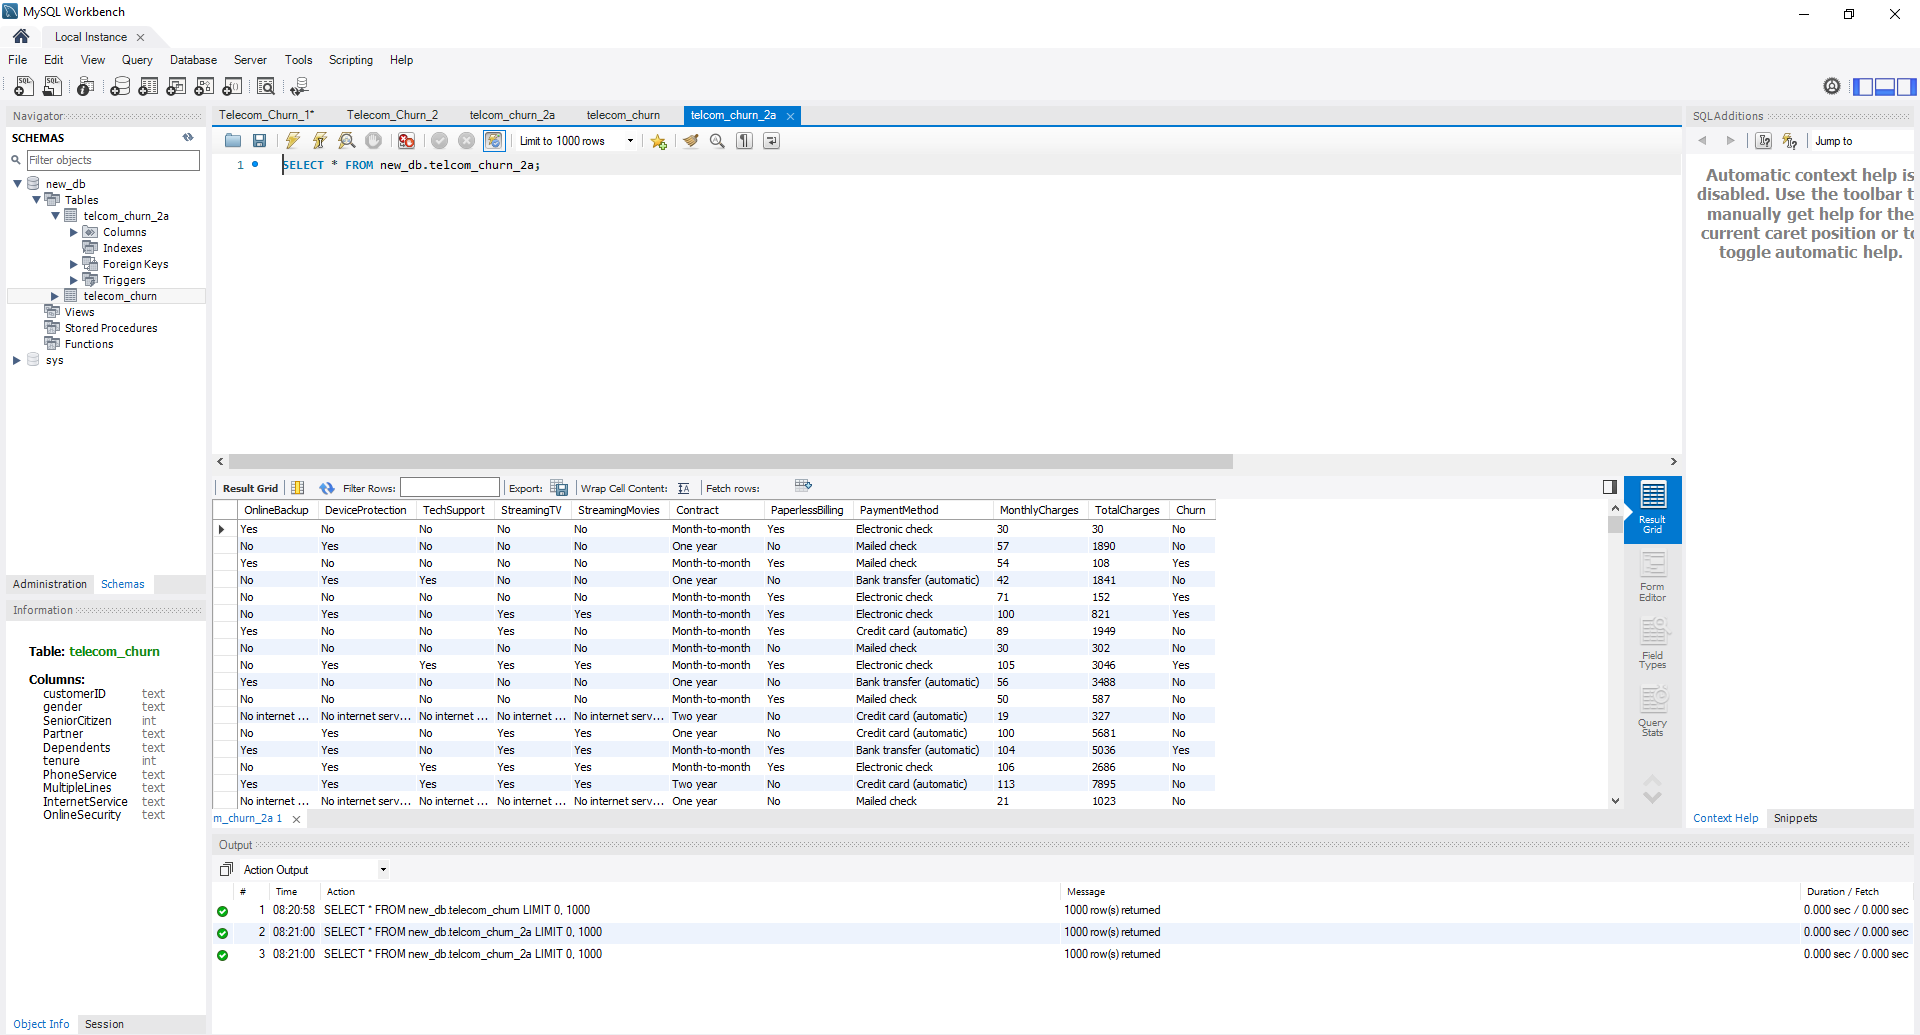

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Dataset 1

In [2]:
import pymysql

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='mysqlroot',db='new_db')

data1=pd.read_sql_query("SELECT * FROM new_db.telecom_churn",conn)

data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [3]:
#data1.to_csv('TelcomCustomer-Churn_1_fromSQL.csv')

In [4]:
#data1 = pd.read_csv('TelcomCustomer-Churn_1_fromSQL.csv')

In [5]:
data1.shape

(7043, 10)

In [6]:
data1.size

70430

In [7]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.3 Dataset 2

In [8]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='mysqlroot',db='new_db')

data2=pd.read_sql_query("SELECT * FROM new_db.telcom_churn_2a",conn)

data2

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30,No
1,No,Yes,No,No,No,One year,No,Mailed check,57,1890,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7027,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,85,1991,No
7028,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7363,No
7029,No,No,No,No,No,Month-to-month,Yes,Electronic check,30,346,No
7030,No,No,No,No,No,Month-to-month,Yes,Mailed check,74,307,Yes


* There were missing values but SQL already removed them when loading into the database

In [9]:
#data2.to_csv('TelcomCustomer-Churn_2_fromSQL.csv')

In [10]:
#data2 = pd.read_csv('TelcomCustomer-Churn_2_fromSQL.csv')

In [11]:
data2.shape

(7032, 11)

In [12]:
data2.size

77352

In [13]:
data2.columns

Index(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.2 Merge all datasets onto one and explore final shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.1 Merging Datasets

In [14]:
# Merging dataset 1, and 2
data = pd.merge(data1, data2, left_index=True, right_index=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30,30,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,57,1890,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,54,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,85,1991,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7363,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30,346,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No,No,No,No,Month-to-month,Yes,Mailed check,74,307,Yes


In [15]:
data.shape

(7032, 21)

In [16]:
data.size

147672

In [17]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

* Here, total charges is supposed to be a numerical datatype but it is a categorical datatype, so theres likely to be a character/alphabetical value in it.

In [19]:
data.to_csv('data.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.2 Checking for Duplicates

In [20]:
# Identify duplicates records in the data
dupe = data.duplicated()
sum(dupe)

0

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.3 Checking for Duplicate Indexes

In [21]:
data.index.is_unique

True

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.4 Checking for Null/missing values

In [22]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [23]:
pd.DataFrame(data.where(data == ' ').count(), columns= ['Number of missing values']) #Total number of ' ' values in the dataset. 

,Number of missing values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


* The missing values were removed from the dataset when loading into MySQL database

<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Missing value treatment

* The missing values were already treated/removed when loading into MySQL database, hence the dataset is clear of any missing values. 

In [24]:
#This is for reference incase the dataset wasnt inserted through SQL 

#def drop_na(dataframe_dropna):
   #dataframe_drop = dataframe_dropna.dropna(inplace = True)
    #return dataframe_dropna

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Convert categorical attributes to continuous using relevant functional knowledge

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.1 Converting 'TotalCharges' into Numerical as it is incorrectly labelled

In [25]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.2 Combining Categorical values (This is not implemented as the model tends to overfit the data)

In [27]:
datacomb = data.copy() #making a copy of the dataset

In [28]:
datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace("(","") 
datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace(")","") 

In [29]:
datacomb['MultipleLines'] = datacomb['MultipleLines'].str.replace('No phone service', 'No')

datacomb['InternetService'] = datacomb['InternetService'].str.replace('Fiber optic', 'Yes')
datacomb['InternetService'] = datacomb['InternetService'].str.replace('DSL', 'Yes')

datacomb['OnlineSecurity'] = datacomb['OnlineSecurity'].str.replace('No internet service', 'No')
datacomb['OnlineBackup'] = datacomb['OnlineBackup'].str.replace('No internet service', 'No')
datacomb['DeviceProtection'] = datacomb['DeviceProtection'].str.replace('No internet service', 'No')
datacomb['TechSupport'] = datacomb['TechSupport'].str.replace('No internet service', 'No')
datacomb['StreamingTV'] = datacomb['StreamingTV'].str.replace('No internet service', 'No')
datacomb['StreamingMovies'] = datacomb['StreamingMovies'].str.replace('No internet service', 'No')

datacomb['Contract'] = datacomb['Contract'].str.replace('One year', 'Year-to-year')
datacomb['Contract'] = datacomb['Contract'].str.replace('Two year', 'Year-to-year')


datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace('Electronic check', 'Not automatic')
datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace('Mailed check', 'Not automatic')
datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace("Credit card automatic", "Automatic")
datacomb['PaymentMethod'] = datacomb['PaymentMethod'].str.replace("Bank transfer automatic", "Automatic")

In [30]:
datacomb

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Not automatic,30,30,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,Year-to-year,No,Not automatic,57,1890,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Not automatic,54,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,Year-to-year,No,Automatic,42,1841,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Not automatic,71,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,Yes,No,...,Yes,Yes,Yes,Yes,Year-to-year,Yes,Not automatic,85,1991,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,Yes,No,...,Yes,No,Yes,Yes,Year-to-year,Yes,Automatic,103,7363,No
7029,2235-DWLJU,Female,1,No,No,6,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Not automatic,30,346,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No,...,No,No,No,No,Month-to-month,Yes,Not automatic,74,307,Yes


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.3 Categorical attributes to Continuous via Label encoding

In [31]:
datac = data.copy()

In [32]:
datac['Churn'].replace(to_replace='Yes', value=1, inplace=True)
datac['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.3 Drop attribute/s if required using relevant functional knowledge

**The 'customerID' column is dropped as it has no impact in EDA and Model building**

In [34]:
def drop_col(dataframe_drop):
    dataframe_drop = dataframe_drop.drop('customerID', axis= 1)
    return dataframe_drop

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.4 Automate all the above steps

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.4.1 Automated Removal of Missing values

In [35]:
# This is for reference incase the dataset wasnt inserted through MySQL server, since MySQL server removed all missing values

#datac = drop_na(datac)
#datac

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.4.2 Automated conversion of categorical to continuous 

In [36]:
#Label encoding
datac = datac.apply(lambda x: object_to_int(x))
datac.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5368,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,30,30,0
1,3957,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,57,1890,0
2,2560,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,54,108,1
3,5527,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42,1841,0
4,6501,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,71,152,1


In [37]:
datac.columns.value_counts().sum() # Number of columns in the 'dummies'

21

In [38]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7032 non-null   int32
 1   gender            7032 non-null   int32
 2   SeniorCitizen     7032 non-null   int64
 3   Partner           7032 non-null   int32
 4   Dependents        7032 non-null   int32
 5   tenure            7032 non-null   int64
 6   PhoneService      7032 non-null   int32
 7   MultipleLines     7032 non-null   int32
 8   InternetService   7032 non-null   int32
 9   OnlineSecurity    7032 non-null   int32
 10  OnlineBackup      7032 non-null   int32
 11  DeviceProtection  7032 non-null   int32
 12  TechSupport       7032 non-null   int32
 13  StreamingTV       7032 non-null   int32
 14  StreamingMovies   7032 non-null   int32
 15  Contract          7032 non-null   int32
 16  PaperlessBilling  7032 non-null   int32
 17  PaymentMethod     7032 non-null  

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.4.3 Automated removal of columns/attributes

In [39]:
#Removal of customerID column
datac = drop_col(datac)

In [40]:
datac.reset_index(drop=True, inplace = True) #Resetting index

In [41]:
datac

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30,30,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,57,1890,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,54,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1841,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,71,152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,0,13,1,0,0,0,0,2,2,2,2,1,1,3,85,1991,0
7028,0,0,1,0,68,1,0,0,0,2,2,0,2,2,1,1,1,103,7363,0
7029,0,1,0,0,6,0,1,0,0,0,0,0,0,0,0,1,2,30,346,0
7030,0,0,0,0,2,1,0,2,1,0,0,0,0,0,0,1,3,74,307,1


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.4.4 Creating a numerical dataset

In [42]:
data.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int64
Churn               object
dtype: object

In [43]:
datanum = datac.copy()
datanum.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','SeniorCitizen'],axis=1,inplace = True)
datanum

,tenure,MonthlyCharges,TotalCharges
0,1,30,30
1,34,57,1890
2,2,54,108
3,45,42,1841
4,2,71,152
...,...,...,...
7027,13,85,1991
7028,68,103,7363
7029,6,30,346
7030,2,74,307


* Senior citizen even though it has a numerical datatype, its categorical in nature. So it is also removed

In [44]:
datanum.dtypes

tenure            int64
MonthlyCharges    int64
TotalCharges      int64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.4.5 Converting Object datatype into Categorical datatype

In [45]:
datacat = data.copy()

In [46]:
datacat['customerID'] = datacat['customerID'].astype('category')
datacat['gender'] = datacat['gender'].astype('category')
datacat['Partner'] = datacat['Partner'].astype('category')
datacat['Dependents'] = datacat['Dependents'].astype('category')
datacat['PhoneService'] = datacat['PhoneService'].astype('category')
datacat['MultipleLines'] = datacat['MultipleLines'].astype('category')
datacat['InternetService'] = datacat['InternetService'].astype('category')
datacat['OnlineSecurity'] = datacat['OnlineSecurity'].astype('category')
datacat['OnlineBackup'] = datacat['OnlineBackup'].astype('category')
datacat['DeviceProtection'] = datacat['DeviceProtection'].astype('category')
datacat['TechSupport'] = datacat['TechSupport'].astype('category')
datacat['StreamingTV'] = datacat['StreamingTV'].astype('category')
datacat['StreamingMovies'] = datacat['StreamingMovies'].astype('category')
datacat['Contract'] = datacat['Contract'].astype('category')
datacat['PaperlessBilling'] = datacat['PaperlessBilling'].astype('category')
datacat['PaymentMethod'] = datacat['PaymentMethod'].astype('category')
datacat['Churn'] = datacat['Churn'].astype('category')

In [47]:
datacat.drop('customerID',axis=1,inplace = True)

In [48]:
datacat.dtypes

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges         int64
TotalCharges           int64
Churn               category
dtype: object

<font size="5"><p style="color:black"> <b> 3. Data analysis & visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Perform detailed statistical analysis on the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Mean, Median and Mode

In [49]:
datanum.mean() # Mean of each attribute.

tenure              32.366894
MonthlyCharges      64.819539
TotalCharges      2283.320535
dtype: float64

In [50]:
datanum.median() #Median of each attribute

tenure              29.0
MonthlyCharges      70.0
TotalCharges      1397.5
dtype: float64

In [51]:
datanum.mode(axis=0, numeric_only = True).T # Prints the mode of the entire table

,0
tenure,1
MonthlyCharges,20
TotalCharges,20


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.2 Quantile 25%, 50% and 75%

In [52]:
datanum.quantile(q=0.25)

tenure              9.00
MonthlyCharges     36.00
TotalCharges      401.75
Name: 0.25, dtype: float64

In [53]:
datanum.quantile(q=0.50)

tenure              29.0
MonthlyCharges      70.0
TotalCharges      1397.5
Name: 0.5, dtype: float64

In [54]:
datanum.quantile(q=0.75)

tenure              55.0
MonthlyCharges      90.0
TotalCharges      3795.0
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [55]:
datanum.min(numeric_only = True) # Minimum Values

tenure             0
MonthlyCharges    18
TotalCharges      19
dtype: int64

In [56]:
datanum.max(numeric_only = True) # Maximum values

tenure              72
MonthlyCharges     119
TotalCharges      8685
dtype: int64

In [57]:
datanum.var(numeric_only = True) #Variance

tenure            6.029153e+02
MonthlyCharges    9.054237e+02
TotalCharges      5.138241e+06
dtype: float64

In [58]:
datanum.std(numeric_only = True) #Standard Deviation

tenure              24.554333
MonthlyCharges      30.090259
TotalCharges      2266.768950
dtype: float64

In [59]:
datanum.cov() #Covariance

,tenure,MonthlyCharges,TotalCharges
tenure,602.915291,3.614932,3.454464e+03
MonthlyCharges,3.614932,905.423694,4.439940e+04
TotalCharges,3454.464375,44399.398202,5.138241e+06


In [60]:
datanum.corr() #Correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.004893,0.062065
MonthlyCharges,0.004893,1.000000,0.650944
TotalCharges,0.062065,0.650944,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.4 Skewness and Kurtosis

In [61]:
from scipy.stats import norm, kurtosis
datanum.skew()  # to measure the skeweness of every attribute

tenure            0.239343
MonthlyCharges   -0.221904
TotalCharges      0.961652
dtype: float64

In [62]:
datanum.kurt(axis=0)  # to measure the Kurtosis of every attribute

tenure           -1.387117
MonthlyCharges   -1.255782
TotalCharges     -0.231767
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.5 Five Summary Analysis

In [63]:
datanum.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.366894,24.554333,0.0,9.00,29.0,55.0,72.0
MonthlyCharges,7032.0,64.819539,30.090259,18.0,36.00,70.0,90.0,119.0
TotalCharges,7032.0,2283.320535,2266.768950,19.0,401.75,1397.5,3795.0,8685.0


* Here TotalCharges has a lot of imbalance, which can be understood because 75% of the data has only 3794 while the remaining 25% has 8684.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.6 Hypothesis Testing

In [64]:
dfmodel = datac.copy()

In [65]:
class_summary=dfmodel.groupby('Churn') #getting mean values of each class for all independent variables
class_summary.mean().reset_index() # values for Churn 0 and 1

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.507263,0.163665,0.489638,0.303506,32.980438,0.904900,0.951579,0.876816,0.797017,1.009297,0.998063,0.942669,1.004261,1.013558,0.887081,0.536122,1.503971,61.330428,2555.361999
1,1,0.497592,0.157838,0.465490,0.288925,30.672017,0.898876,0.909042,0.862493,0.770465,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,74.457999,1531.822365


**1) Statistical Testing of continuous feature with target variable**

In [66]:
col=list(dfmodel.select_dtypes(include=['int32','int64','float64']).columns)

**Here we will be using two-sample unpaired t-test**

a) Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

b) H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

In [67]:
for i in col:
    x = np.array(dfmodel[dfmodel.Churn == 0][i]) 
    y = np.array(dfmodel[dfmodel.Churn == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Churners and non churners are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Churners and non churners are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.4738173481575919
 Fail to Reject Null Hypothesis.gender of Churners and non churners are  same


 P_Value:0.5555637032927443
 Fail to Reject Null Hypothesis.SeniorCitizen of Churners and non churners are  same


 P_Value:0.07323536053033784
 Fail to Reject Null Hypothesis.Partner of Churners and non churners are  same


 P_Value:0.23536757284894724
 Fail to Reject Null Hypothesis.Dependents of Churners and non churners are  same


 P_Value:0.0004953936561673531
 Rejecting Null Hypothesis.tenure of Churners and non churners are not same


 P_Value:0.45616346294180166
 Fail to Reject Null Hypothesis.PhoneService of Churners and non churners are  same


 P_Value:0.09573947588020754
 Fail to Reject Null Hypothesis.MultipleLines of Churners and non churners are  same


 P_Value:0.4733973524779631
 Fail to Reject Null Hypothesis.InternetService of Churners and non churners are  same


 P_Value:0.2513397092843976
 Fail to Reject Null Hypothesis.OnlineSecurity of Churners and non ch

* We can see that PhoneService and gender columns have failed to reject null hypothesis, hence they should get removed from the dataset for model building

In [68]:
dfmodel.drop(['PhoneService','gender'],axis=1,inplace=True)

In [69]:
dfmodel

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,30,30,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,57,1890,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,54,108,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42,1841,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,71,152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,13,0,0,0,0,2,2,2,2,1,1,3,85,1991,0
7028,0,1,0,68,0,0,0,2,2,0,2,2,1,1,1,103,7363,0
7029,1,0,0,6,1,0,0,0,0,0,0,0,0,1,2,30,346,0
7030,0,0,0,2,0,2,1,0,0,0,0,0,0,1,3,74,307,1


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.1 Univariate Analysis
   

### a) Distplot Univariate plot

**Distplot of the dataset**

<AxesSubplot:ylabel='Density'>

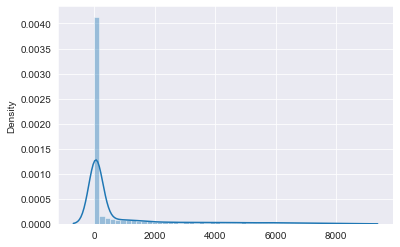

In [70]:
sns.distplot(datanum) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

* From the above plot, it is understood that the dataset as a whole follows normal distribution. The reason why this visual plot could be misleading is because there is more data in Total charges giving it the higher magnitude, so the distribution of the dataset cannot be understood from the above plot. It should be normalized for better understanding.

In [71]:
# Normalizing the dataset for getting better understanding of the dataset and to tackle Chebyshevs inequality
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [72]:
datanorm = datanum.copy()

In [73]:
# returns z-scores of the values of the attribute
datanorm['MonthlyCharges'] = std_scale.fit_transform(datanorm[['MonthlyCharges']]) 
datanorm['tenure'] = std_scale.fit_transform(datanorm[['tenure']]) 
datanorm['TotalCharges'] = std_scale.fit_transform(datanorm[['TotalCharges']]) 

<AxesSubplot:ylabel='Density'>

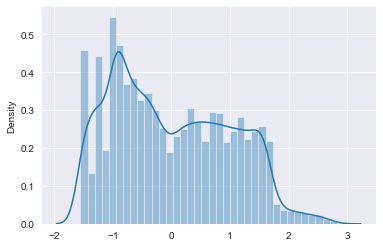

In [74]:
sns.distplot(datanorm) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

* After normalizing/scaling, the dataset is more accurate in the distribution. It is not normally distributed and hence follows chebycehvs rule. We can use Chebyshevs inequality for estimation for better understanding of the dataset.

* The model is bi modal, which means, it has two modes. This would mean that, it follows Chebyshevs rule, 1-1/K, here, K=2. mean ± 2 standard deviations

**Distplot for Skewness and Kurtosis**

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='TotalCharges', ylabel='Density'>

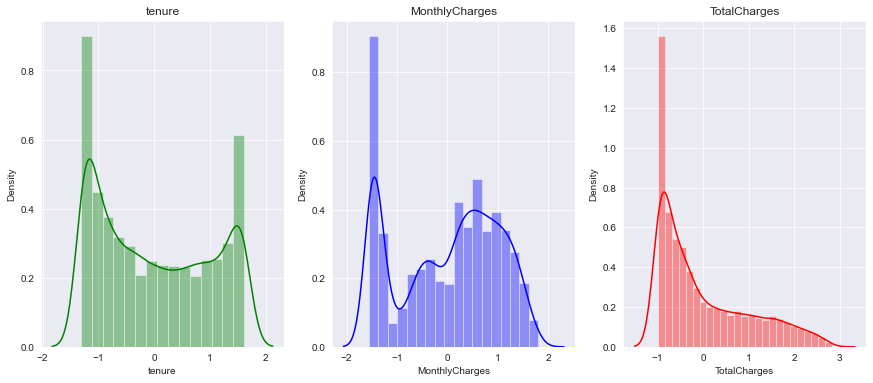

In [75]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('tenure')
sns.distplot(datanorm['tenure'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('MonthlyCharges')
sns.distplot(datanorm['MonthlyCharges'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('TotalCharges')
sns.distplot(datanorm['TotalCharges'],color='red')

* Tenure, and MonthlyCharges attribute is not normally distributed and has 2 modes. The model is bi modal, which means, it has two modes. This would mean that, it follows Chebyshevs rule, 1-1/K, here, K=2. mean ± 2 standard deviations.


* TotalCharges attribute is normally distributed but has high right skewness.


From the above Plot, we can get a visual representation of the skewness and Kurtosis in the data.

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.


>Tenure = 0.237, low positive/right skewness

>MonthlyCharges = -0.222, low negative/left skewness

>TotalCharges = 0.96, high positive/right skewness

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

>Tenure =-1.387, highly flat peak - has high depression (inward) in curve

>MonthlyCharges = -1.256, highly flat peak - has high depression (inward) in curve

>TotalCharges = -0.231, highly flat peak - has slight depression (inward) in curve



### b) Barplot of categorical attributes in the dataset

**Barplot for Gender to Frequency**

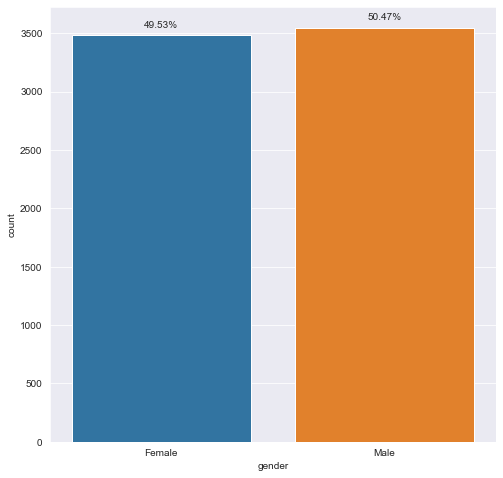

In [76]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['gender'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'gender') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* customers of genders male and female are almost equal in proportion and no imbalance in distribution.

**Barplot for SeniorCitizen to Frequency**

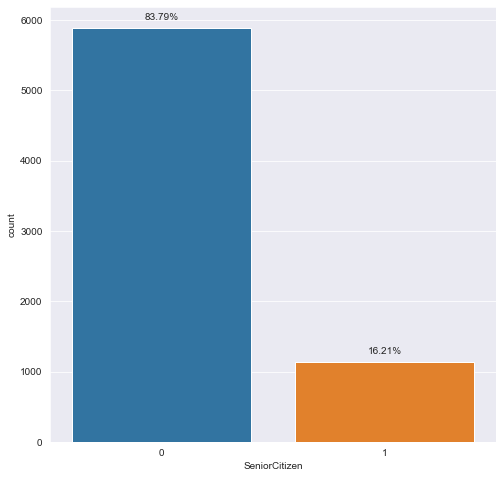

In [77]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['SeniorCitizen'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'SeniorCitizen')
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is imbalanced because the majority of customers are not Seniorcitizens while the minority are seniorcitizens.

**Barplot for Partner to Frequency**

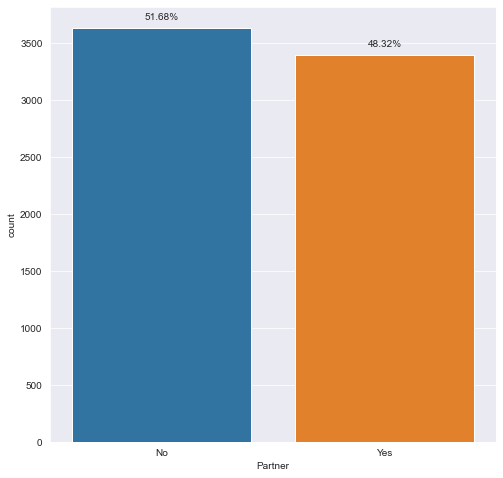

In [78]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['Partner'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'Partner') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is balanced and theres an equal proportion of customers with partners to customers not having partners.

**Barplot for Dependents to Frequency**

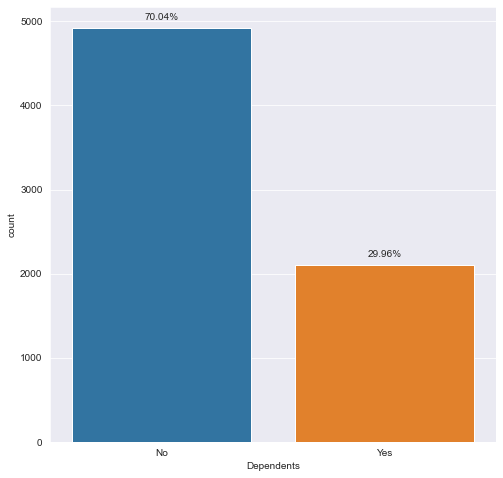

In [79]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['Dependents'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'Dependents') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is moderately imbalanced and majority of the customer is not a dependent and only minority are dependent on financial assistance from family.

**Barplot for PhoneService to Frequency**

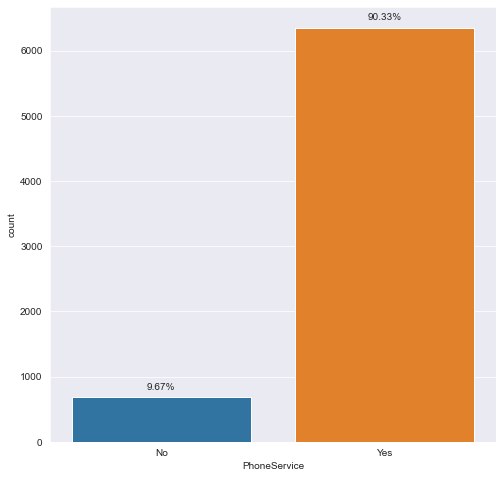

In [80]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['PhoneService'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'PhoneService') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is highly imbalanced, majority have phone service while the minority dont have phone service

**Barplot for MultipleLines to Frequency**

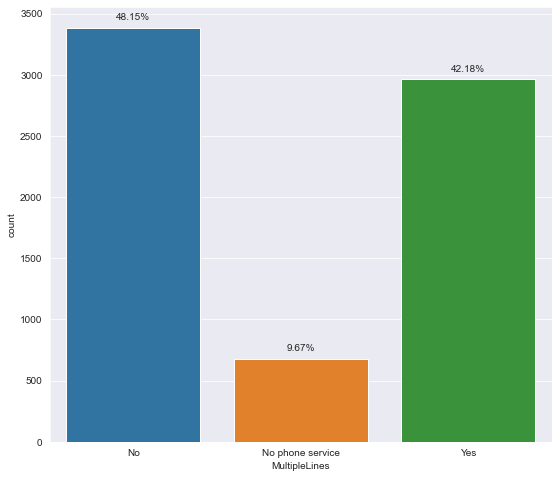

In [81]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['MultipleLines'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'MultipleLines') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No phone service' which can be merged as 'No' giving a total of 58.21% without multiple lines and 42.25% for having multiple lines. The Distribution is slightly imblanced.

**Barplot for InternetService to Frequency**

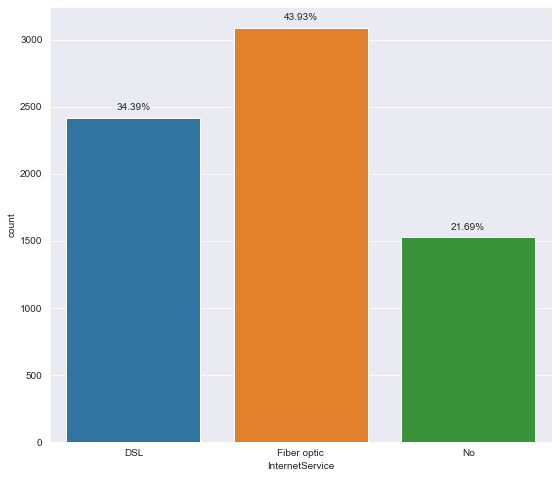

In [82]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['InternetService'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'InternetService') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'DSL' and 'Fiber optic' which can be merged as 'Yes' giving a total of 78.43% with internet service and 21.7% without internet service. The Distribution is Moderately imbalanced.

**Barplot for OnlineSecurity to Frequency**

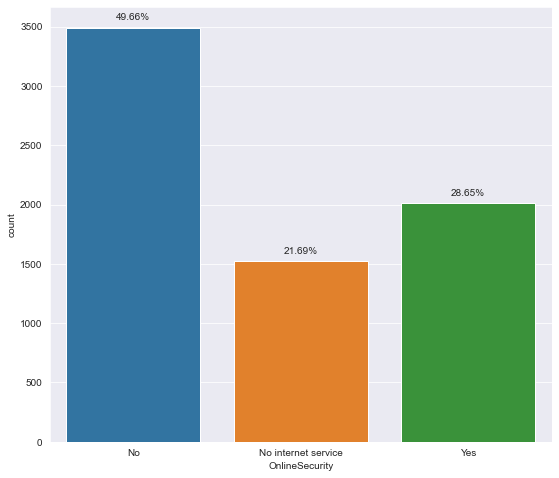

In [83]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['OnlineSecurity'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'OnlineSecurity') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 71.29% without online security and 28.71% for with online security. The Distribution is moderately imblanced.

**Barplot for OnlineBackup to Frequency**

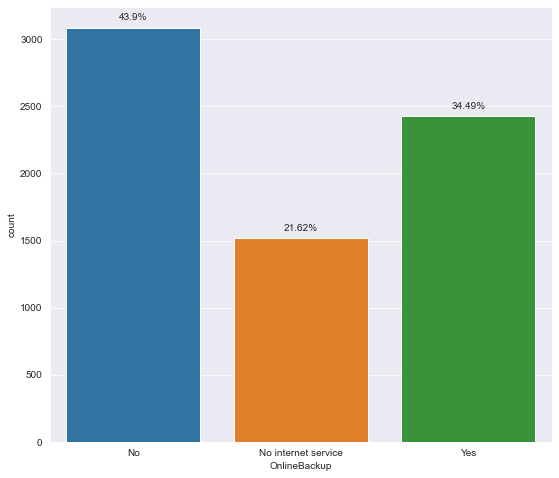

In [84]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['OnlineBackup'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'OnlineBackup') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 65.46% without online backup and 34.54% for with online backup. The Distribution is slightly imblanced.

**Barplot for DeviceProtection to Frequency**

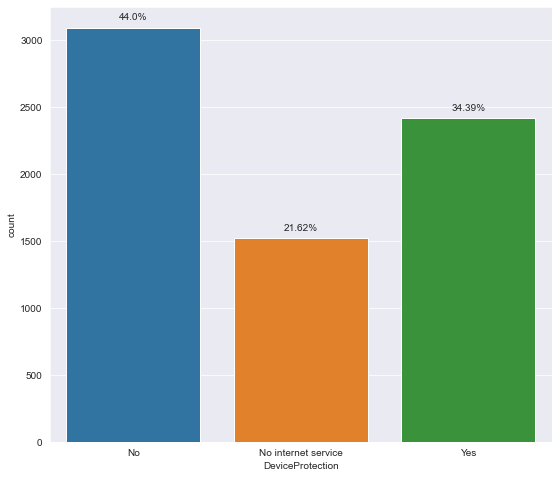

In [85]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['DeviceProtection'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'DeviceProtection') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 65.6% without Device Protection and 34.4% for with Device Protection. The Distribution is moderately imblanced.

**Barplot for TechSupport to Frequency**

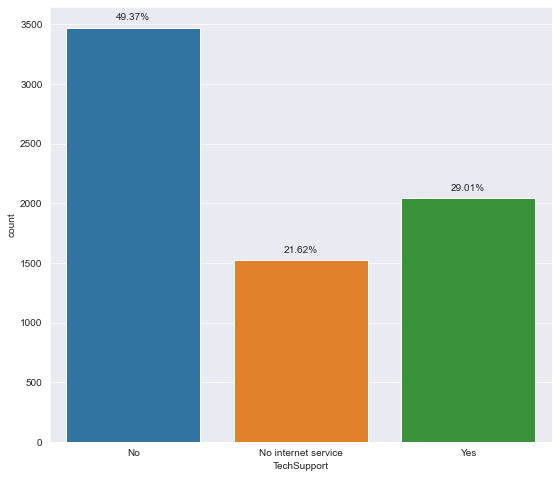

In [86]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['TechSupport'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'TechSupport') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 70.93% that have not used TechSupport service and 29.07% that have used TechSupport service. The Distribution is moderately imblanced.

**Barplot for StreamingTV to Frequency**

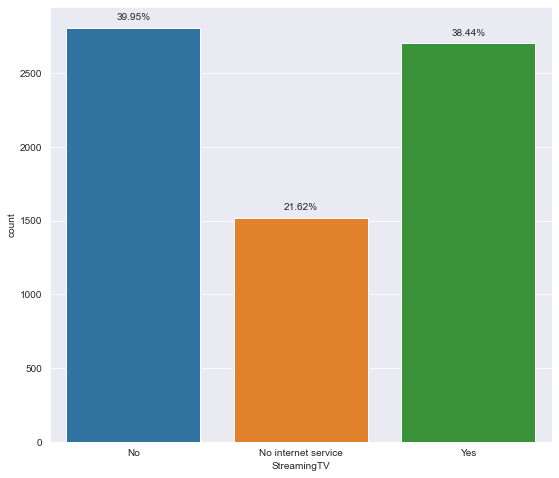

In [87]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['StreamingTV'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'StreamingTV') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 61.5% that do not stream TV shows and 38.5% that stream TV shows. The Distribution is moderately imblanced.

**Barplot for StreamingMovies to Frequency**

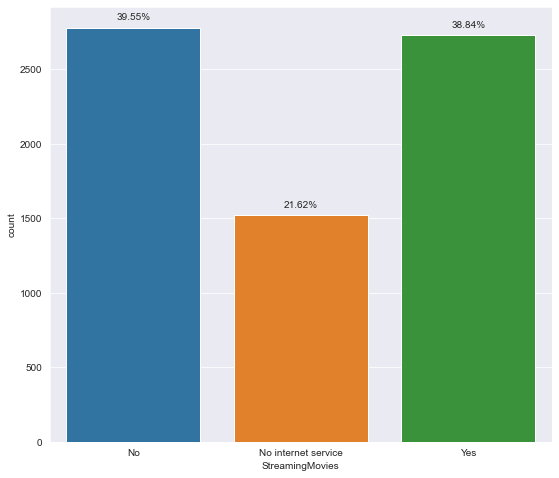

In [88]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['StreamingMovies'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'StreamingMovies') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'No' and 'No internet service' which can be merged as 'No' giving a total of 61.2% that do not stream movies and 38.8% that stream movies. The Distribution is moderately imblanced.

**Barplot for Contract to Frequency**

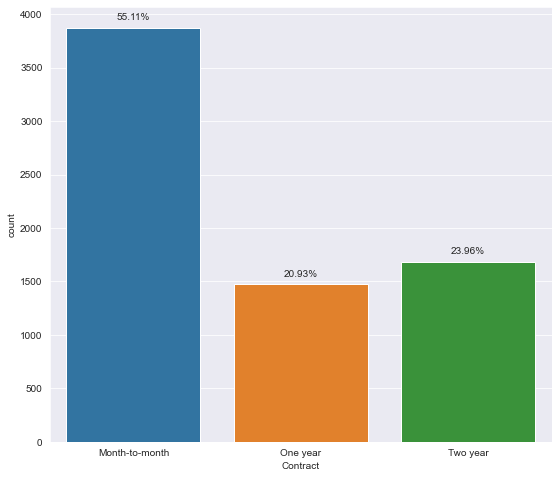

In [89]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['Contract'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'Contract') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 3 categorical values. Theres 'One year' and 'Two year' contracts which can be merged as 'year-to-year' giving a total of 45.05% that are using year to year contracts and 54.95% that are using month to month contracts. The Distribution is slightly imbalanced.

**Barplot for PaperlessBilling to Frequency**

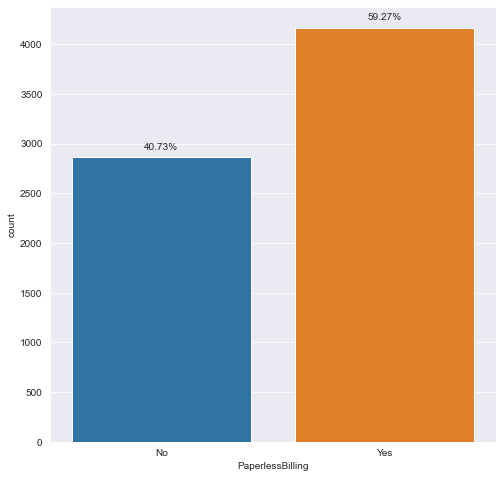

In [90]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['PaperlessBilling'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'PaperlessBilling') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is slightly imbalanced and 59.3% of the customer use paperless billing while only 40.8% use paper billing.

**Barplot for PaymentMethod to Frequency**

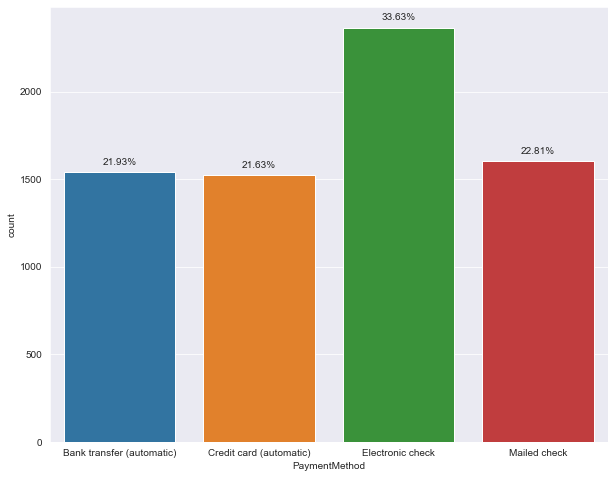

In [91]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['PaymentMethod'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'PaymentMethod') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The Distribution has 4 categorical values. Theres 'Bank transfer (automatic)' and 'Credit card (automatic)' payment methods which can be merged as 'Automatic' giving a total of 43.6% and 'Electronic check' and 'Mailed check' payment methods can be merged as 'Not automatic' giving a total of '56.55%' which is slightly imbalanced.

**Barplot for Churn to Frequency**

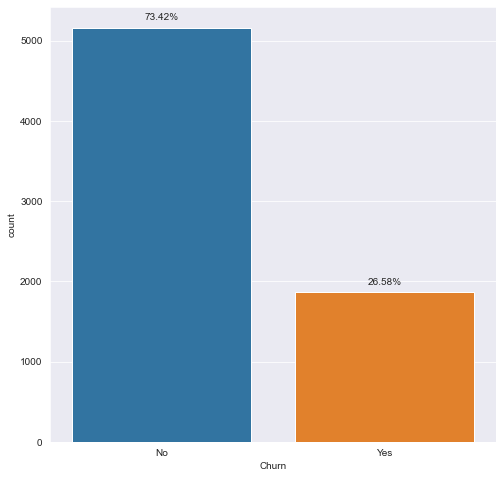

In [92]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(datacat['Churn'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = datacat, x= 'Churn') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(datac)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The distribution is moderately imbalanced and 73.58% of the customers dont churn while 26.58% churn from company

### c) MEAN, MEDIAN AND MODE HISTOGRAM

**Tenure vs Frequency**

Mean:  32.36689419795222 
Median:  29.0 
Mode:  1


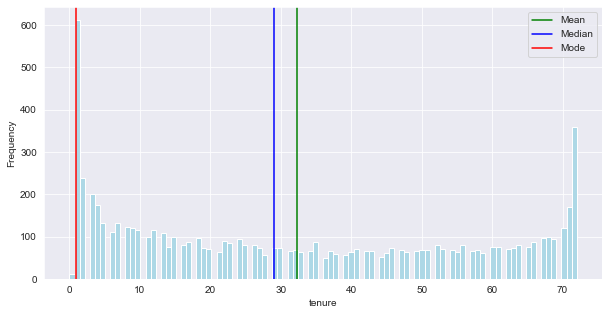

In [93]:
mean=datanum['tenure'].mean()
median=datanum['tenure'].median()
mode=datanum['tenure'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(datanum['tenure'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('tenure')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (32.4) ~ Median (29.0 ) != Mode (1)

* Here, Mode <  Median < Mean - It is Right skewed or Positive Skewness. 

**MonthlyCharges vs Frequency**

Mean:  64.81953924914676 
Median:  70.0 
Mode:  20


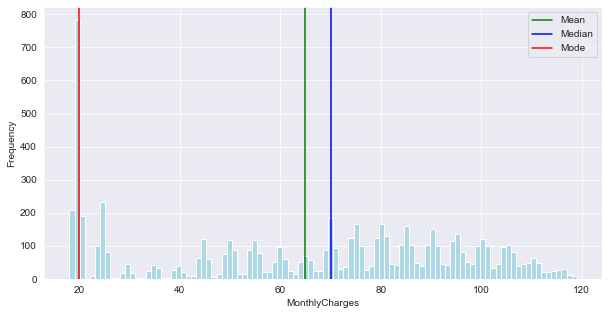

In [94]:
mean=datanum['MonthlyCharges'].mean()
median=datanum['MonthlyCharges'].median()
mode=datanum['MonthlyCharges'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(datanum['MonthlyCharges'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('MonthlyCharges')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (64.7) ~ Median (70.3) != Mode (20.0)

* Here, Mode < ( Median > Mean) - It is Left skewed or Negative Skewness. 

**TotalCharges vs Frequency**

Mean:  2283.320534698521 
Median:  1397.5 
Mode:  20


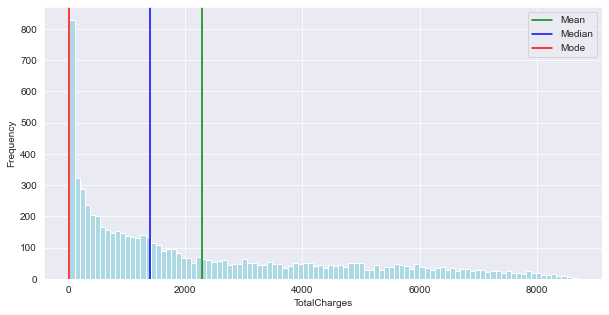

In [95]:
mean=datanum['TotalCharges'].mean()
median=datanum['TotalCharges'].median()
mode=datanum['TotalCharges'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(datanum['TotalCharges'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('TotalCharges')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (2283.3) != Median (1397.4) != Mode (20.2)

* Here, Mode <  Median < Mean - It is highly Right skewed or Positive Skewness. 

### d) BOX PLOT

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='TotalCharges'>

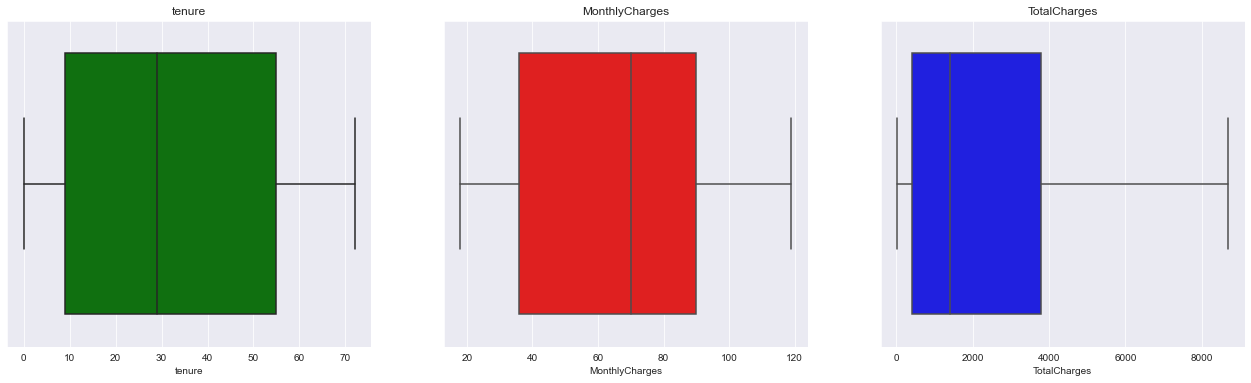

In [96]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('tenure')
sns.boxplot(datanum['tenure'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('MonthlyCharges')
sns.boxplot(datanum['MonthlyCharges'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('TotalCharges')
sns.boxplot(datanum['TotalCharges'],orient='vertical',color='blue')

In [97]:
# Finding the Interquartile Range for the Dataset
Q1 = datanum.quantile(0.25)
Q2 = datanum.quantile(0.50)
Q3 = datanum.quantile(0.75) 
IQR = Q3 - Q1
IQR

tenure              46.00
MonthlyCharges      54.00
TotalCharges      3393.25
dtype: float64

In [98]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

tenure             -60.000
MonthlyCharges     -45.000
TotalCharges     -4688.125
dtype: float64

In [99]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

tenure             124.000
MonthlyCharges     171.000
TotalCharges      8884.875
dtype: float64

**Total number of Upper fence outliers**

In [100]:
# Count of Outliers over the upper fence
countoutup =(datanum>Upperfence_inner).sum()
countoutup

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

**Total number of Lower fence outliers**

In [101]:
# Count of Outliers below the lower fence
countoutdown =(datanum<Lowerfence_inner).sum()
countoutdown

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

**Total number of outliers**

In [102]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

* There are no outliers in the dataset identified by pandas

### e) CUMULATIVE DISTRIBUTION

<AxesSubplot:ylabel='Density'>

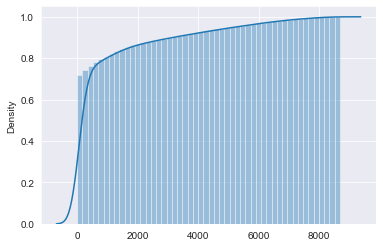

In [103]:
#Cumulative Distribution Plot
sns.distplot(datanum, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.2 Bivariate Analysis
   

In [104]:
datacat.dtypes

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges         int64
TotalCharges           int64
Churn               category
dtype: object

### Bivariate barplot between Categorical and continuous attributes

**Tenure vs all categorical attributes**

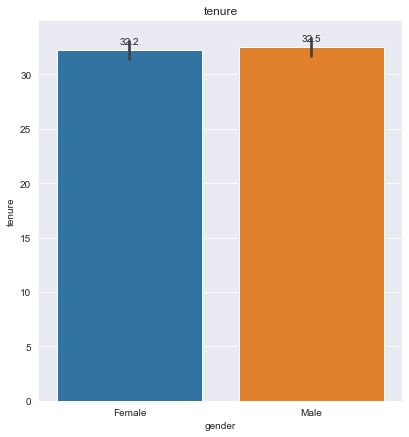

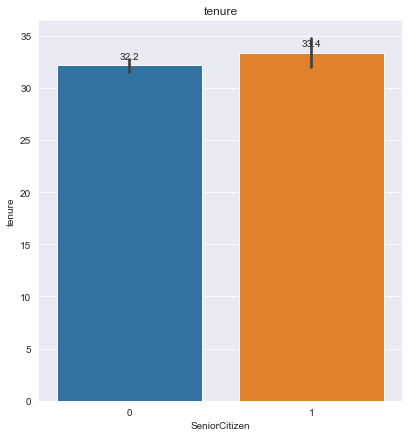

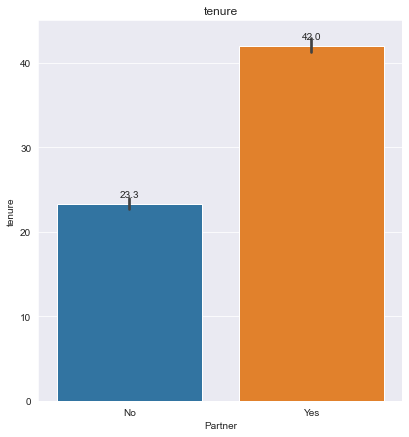

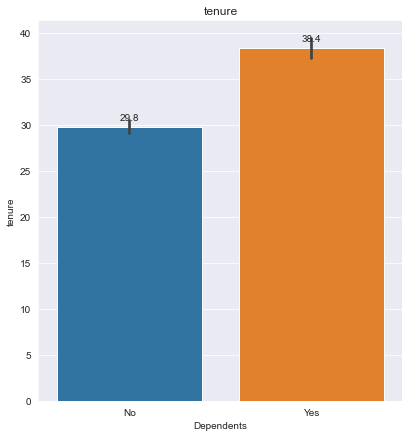

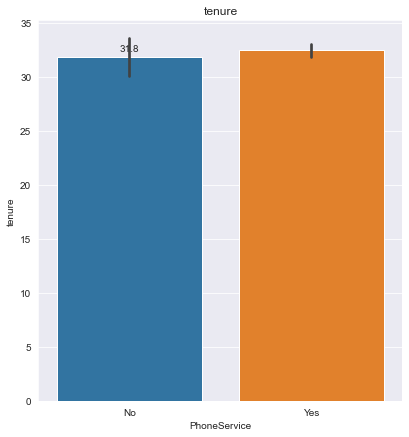

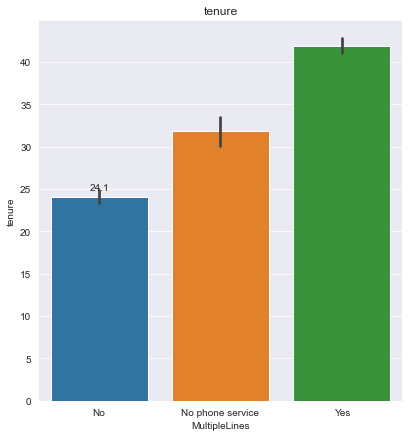

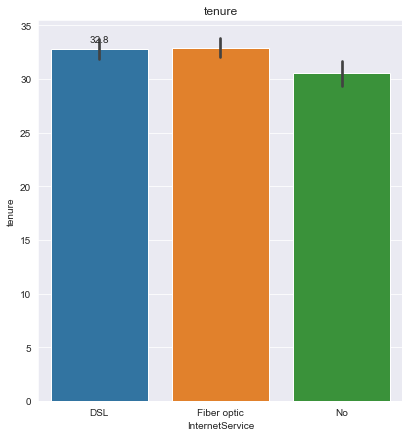

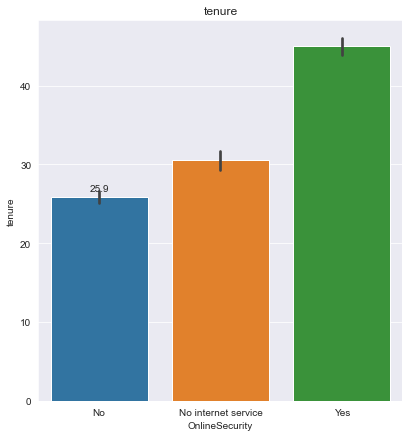

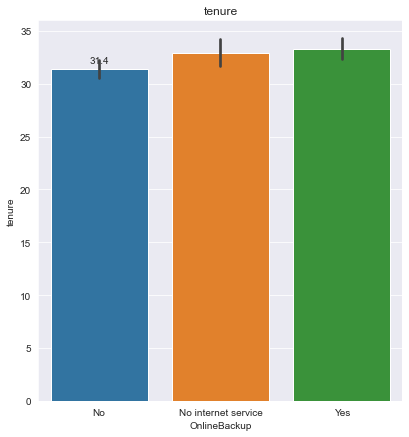

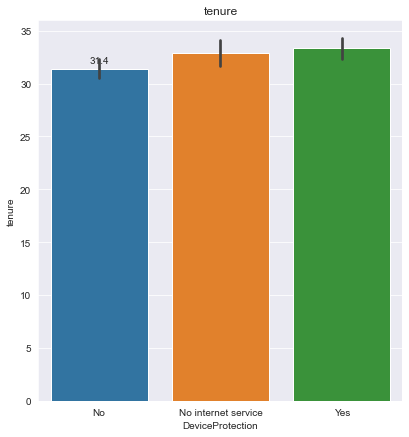

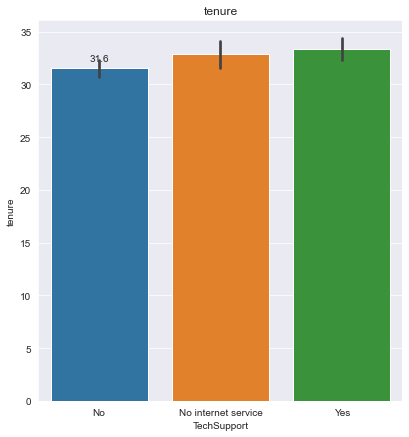

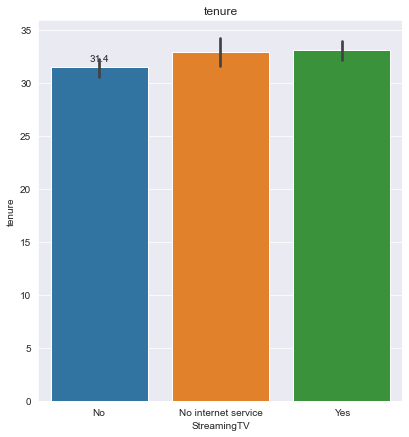

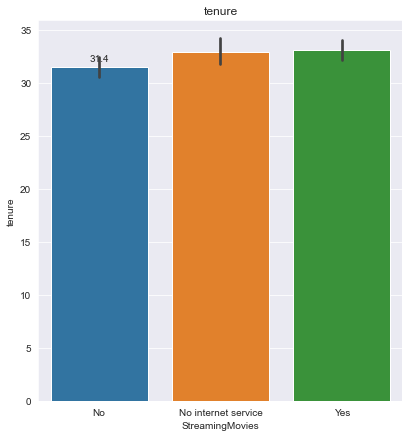

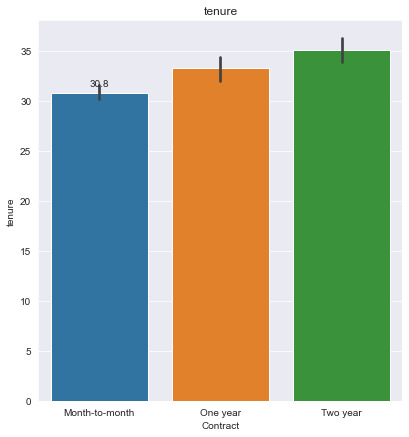

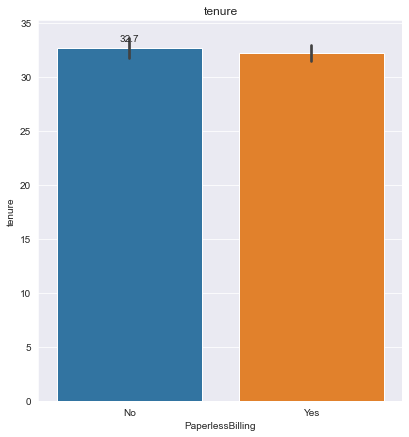

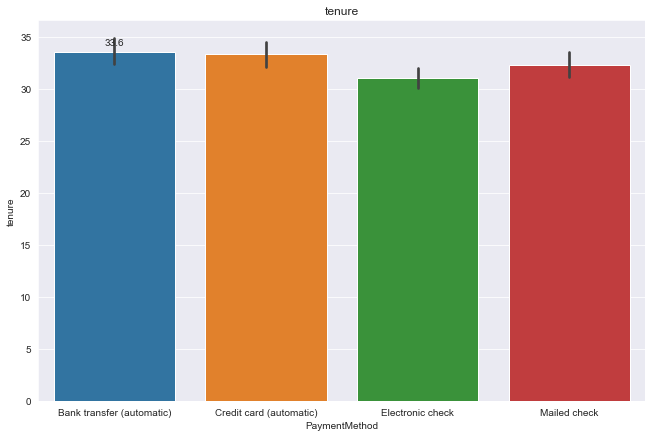

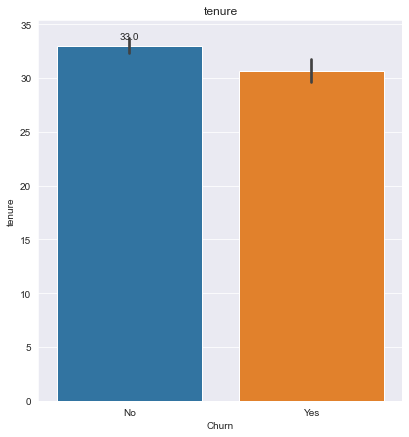

In [105]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['gender'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['SeniorCitizen'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['Partner'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['Dependents'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['PhoneService'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
    

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['MultipleLines'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['InternetService'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['OnlineSecurity'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['OnlineBackup'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['DeviceProtection'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['TechSupport'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['StreamingTV'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['StreamingMovies'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['Contract'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['PaperlessBilling'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['PaymentMethod'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('tenure')
splot = sns.barplot(x=datacat['Churn'], y=datacat['tenure'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()

The above plot is 'tenure' continuous attribute vs all categorical attributes. Customer tenure is the length of time since the beginning of the customer relationship.

* gender - male and female customers have equal tenure.


* SeniorCitizen - senior citizens have slightly higher tenure to non senior citizens.


* Partner - customers with partners have higher tenure than without partners.


* Dependents - customers with dependents have higher tenure than without without dependents.


* PhoneService - customers with phone service have slightly higher tenure compared to customers without phone service


* MultipleLines - customers with multiple lines have higher tenure compared to customers without multiple lines


* InternetService - customers with internet service have higher tenure compared to customers without internet service


* OnlineSecurity - customers with Online security have higher tenure compared to customers without Online security


* OnlineBackup - customers with OnlineBackup have higher tenure compared to customers without OnlineBackup


* DeviceProtection - customers with DeviceProtection have higher tenure compared to customers without DeviceProtection


* TechSupport -customers that used TechSupport have higher tenure compared to customers that havent used TechSupport


* StreamingTV - customers that stream tv shows have higher tenure compared to customers that dont stream tv shows


* StreamingMovies -customers that stream movies have higher tenure compared to customers that dont stream movies


* Contract - customers with Year-to-year contracts have higher tenure compared to customers that have Month-to-month contracts.


* PaperlessBilling - customers with and without paperless billing have equal tenure.


* PaymentMethod - customers with Automatic payment methods have higher tenure compared to customers with Non Automatic payment methods.

* Churn - customers that dont churn have higher tenure compared to customers that churn.


**MonthlyCharges vs all categorical attributes**

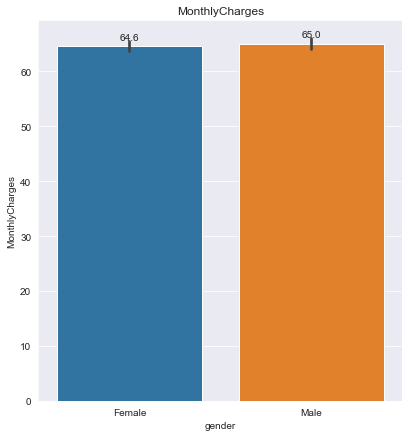

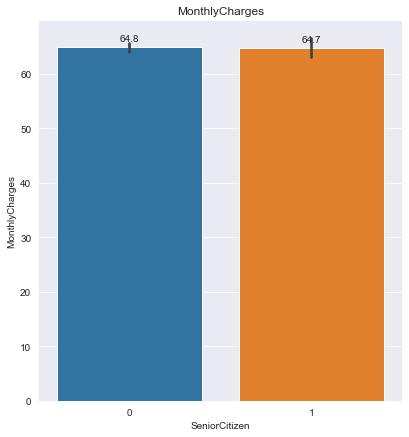

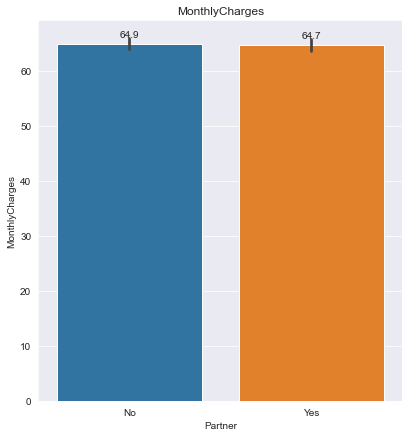

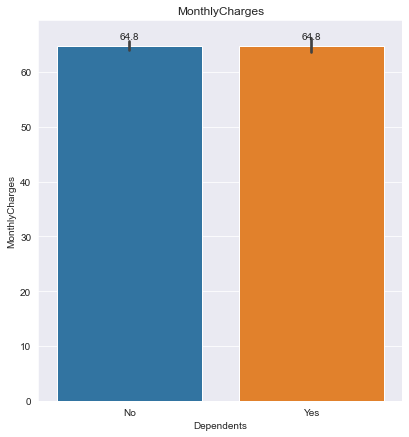

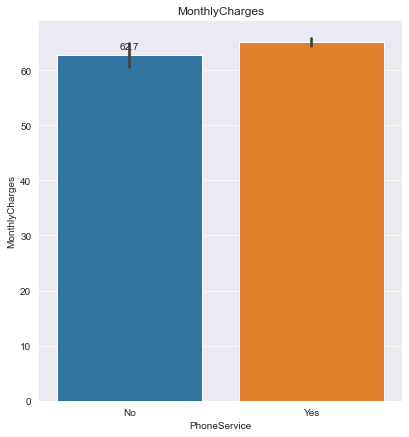

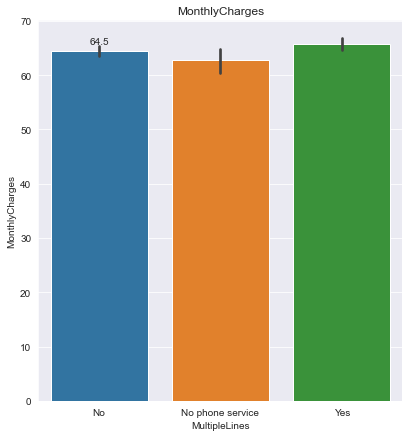

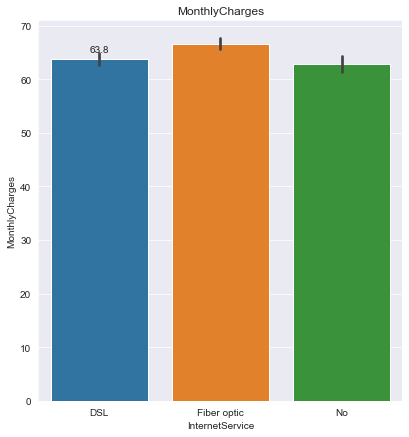

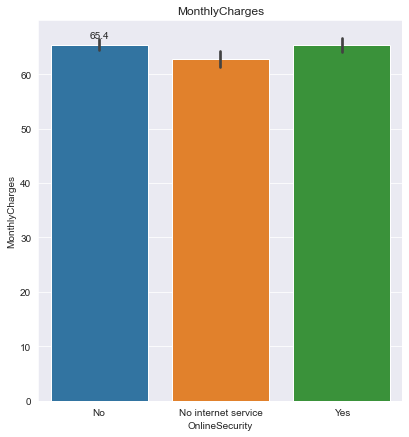

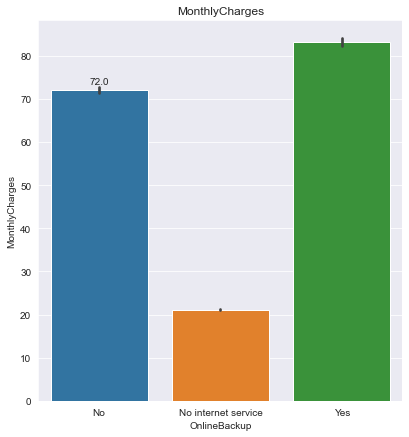

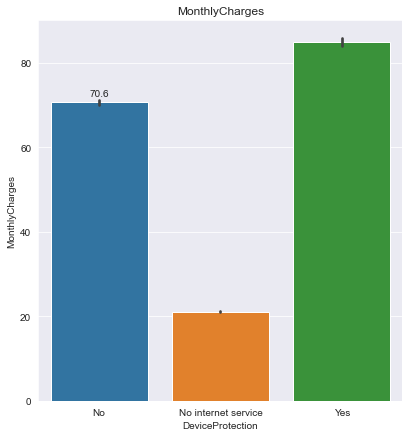

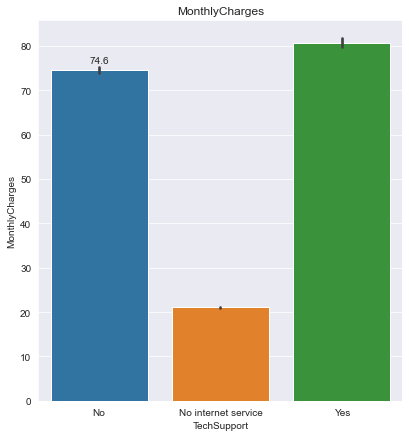

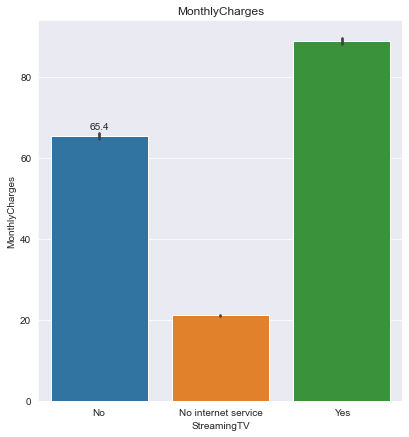

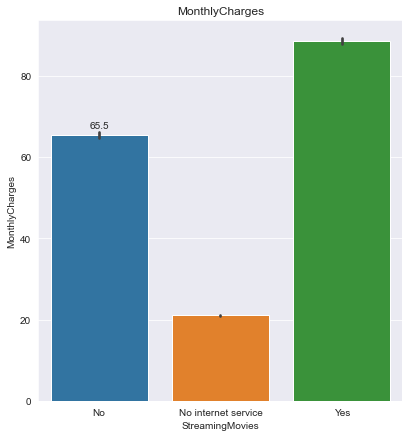

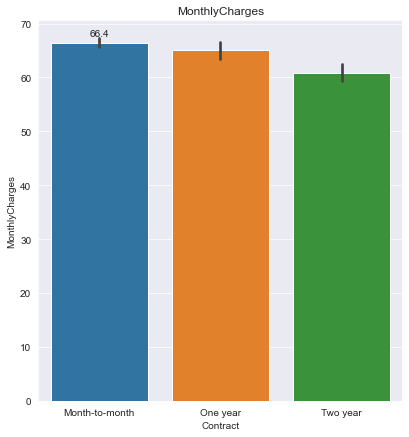

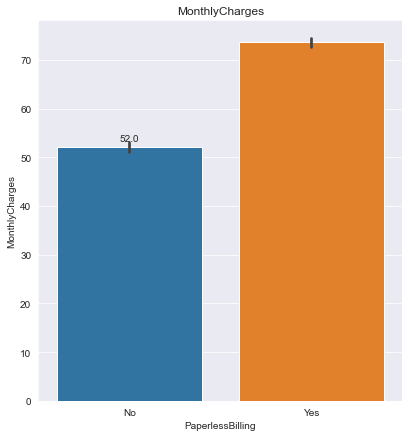

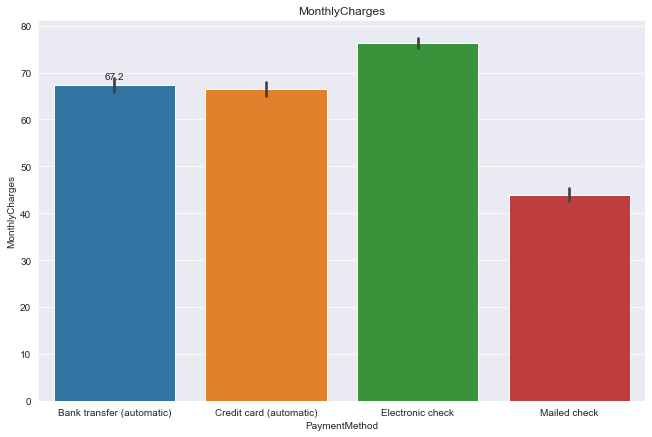

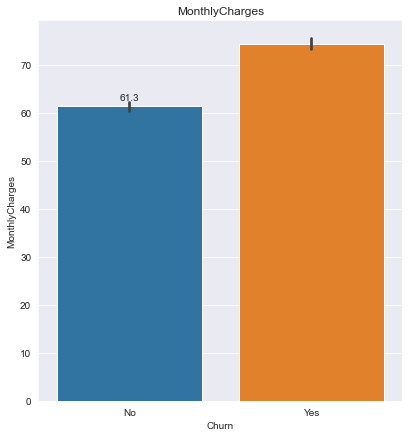

In [106]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['gender'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['SeniorCitizen'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['Partner'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['Dependents'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['PhoneService'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
    

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['MultipleLines'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['InternetService'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['OnlineSecurity'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['OnlineBackup'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['DeviceProtection'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['TechSupport'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['StreamingTV'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['StreamingMovies'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['Contract'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['PaperlessBilling'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['PaymentMethod'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MonthlyCharges')
splot = sns.barplot(x=datacat['Churn'], y=datacat['MonthlyCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()

The above plot is 'MonthlyCharges' continuous attribute vs all categorical attributes

* gender - Female customers have slightly higher MonthlyCharges compared to Male customers.


* SeniorCitizen - senior citizens have higher MonthlyCharges to non senior citizens.


* Partner - customers with partners have higher MonthlyCharges than without partners.


* Dependents - customers without dependents have higher MonthlyCharges than with dependents.


* PhoneService - customers with phone service have higher MonthlyCharges compared to customers without phone service


* MultipleLines - customers with multiple lines have higher MonthlyCharges compared to customers without multiple lines


* InternetService - customers with internet service have higher MonthlyCharges (out of which, Fiberoptic and DSL - Fiberoptic has higher monthly charges) compared to customers without internet service


* OnlineSecurity - customers with Online security and without online security have higher MonthlyCharges compared to customers without no internet service.


* OnlineBackup - customers with OnlineBackup and without OnlineBackup have higher MonthlyCharges compared to customers without no internet service.


* DeviceProtection - customers with DeviceProtection and without DeviceProtection have higher MonthlyCharges compared to customers without no internet service.


* TechSupport -customers with TechSupport and without TechSupport have higher MonthlyCharges compared to customers without no internet service.


* StreamingTV - customers with StreamingTV and without StreamingTV have higher MonthlyCharges compared to customers without no internet service.


* StreamingMovies -customers with StreamingMovies and without StreamingMovies have higher MonthlyCharges compared to customers without no internet service.


* Contract - customers with Month-to-Month contracts have higher MonthlyCharges compared to customers that have Year-to-year contracts.


* PaperlessBilling - customers with paperless billing have higher MonthlyCharges than without paperless billing.


* PaymentMethod - customers with in the following decreasing order of MonthlyCharges in PaymentMethod:  Electronic check > Bank transfer > Credit card > Mailed check.


* Churn - customers that churn have higher MonthlyCharges compared to customers that dont churn.


**TotalCharges vs all categorical attributes**

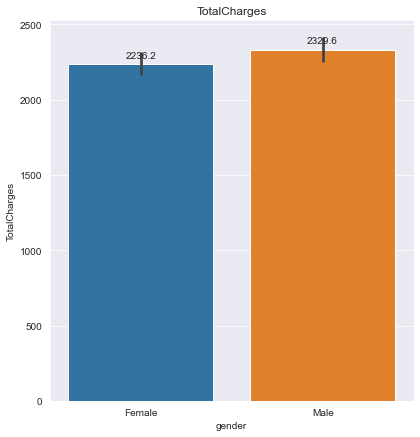

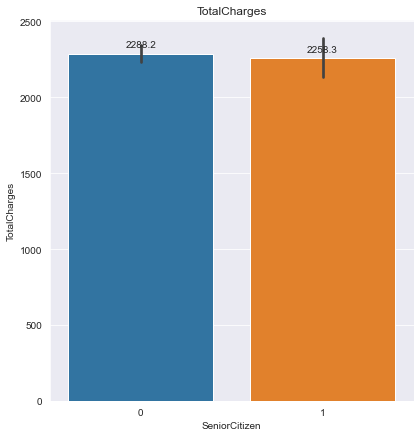

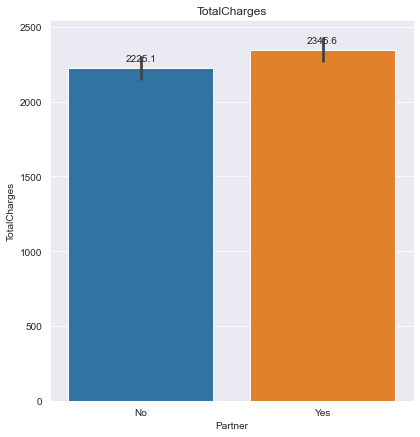

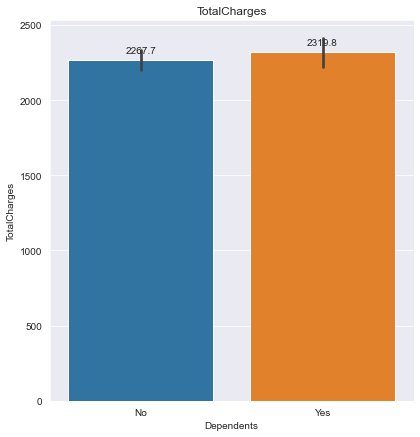

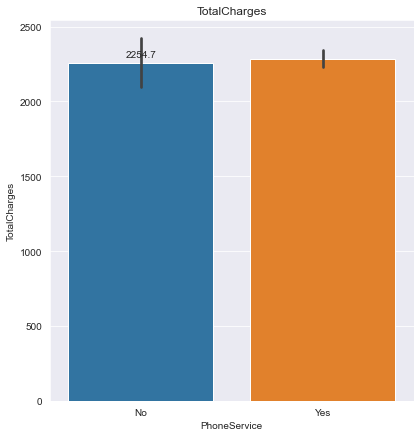

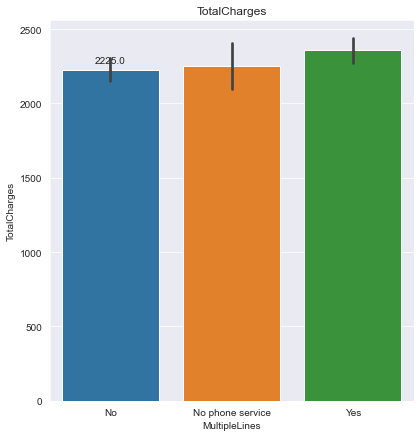

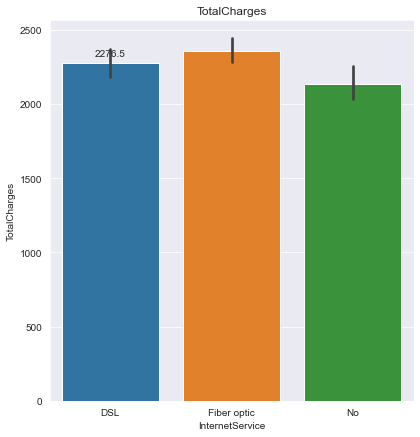

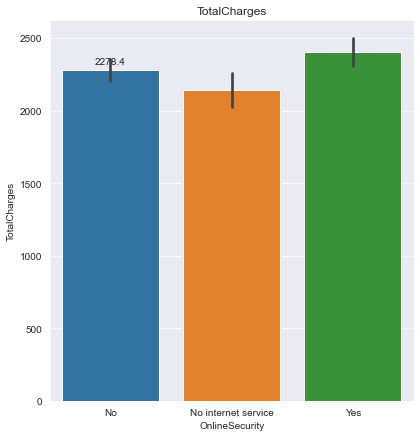

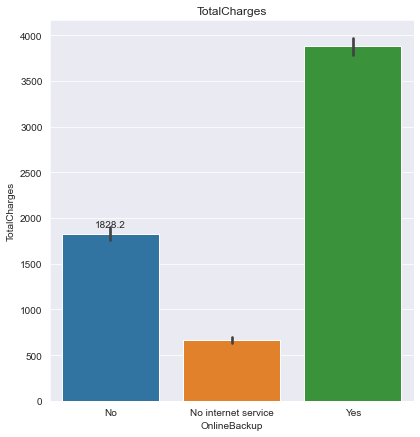

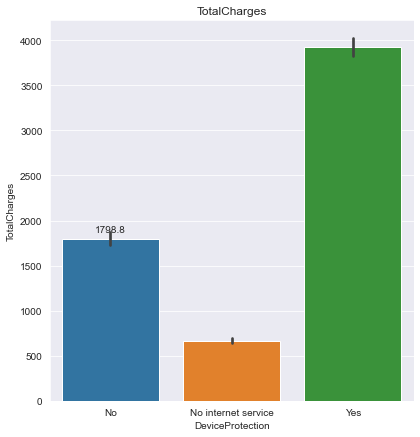

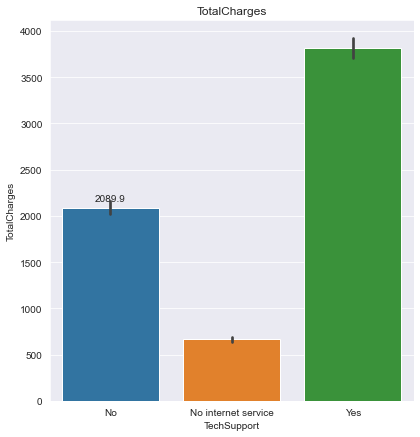

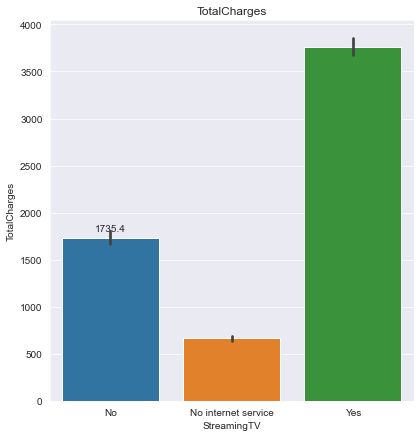

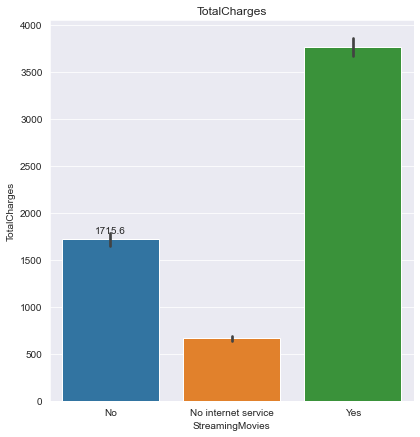

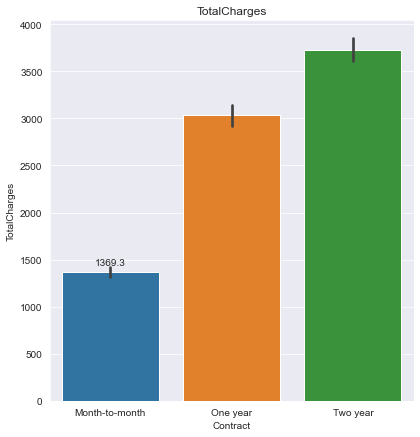

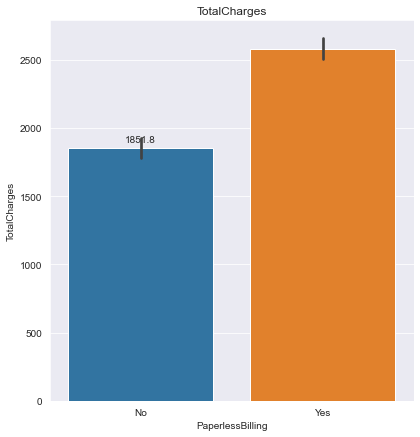

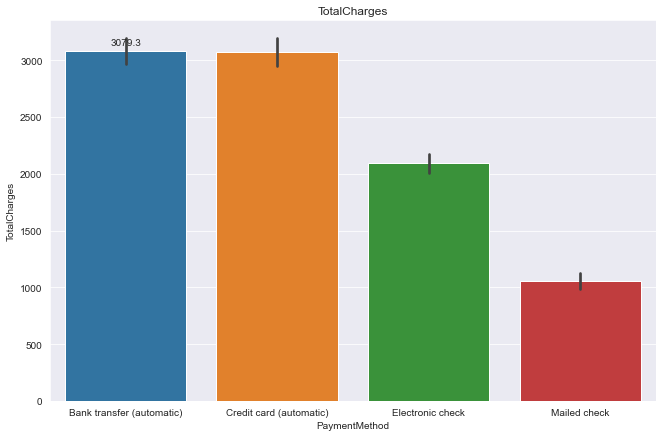

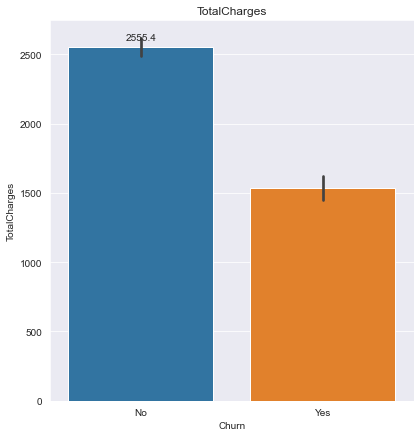

In [107]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['gender'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['SeniorCitizen'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['Partner'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['Dependents'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['PhoneService'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
    

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['MultipleLines'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['InternetService'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['OnlineSecurity'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['OnlineBackup'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['DeviceProtection'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['TechSupport'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['StreamingTV'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['StreamingMovies'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['Contract'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['PaperlessBilling'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['PaymentMethod'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()
    
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('TotalCharges')
splot = sns.barplot(x=datacat['Churn'], y=datacat['TotalCharges'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()

The above plot is 'TotalCharges' continuous attribute vs all categorical attributes


* gender - Male and Female customers have the same TotalCharges.


* SeniorCitizen - senior citizens have higher TotalCharges to non senior citizens.


* Partner - customers with partners have higher TotalCharges than without partners.


* Dependents - customers with dependents have higher TotalCharges than without dependents.


* PhoneService - customers with phone service have higher TotalCharges compared to customers without phone service


* MultipleLines - customers with multiple lines have higher TotalCharges compared to customers without multiple lines


* InternetService - customers with internet service have higher TotalCharges (out of which, Fiberoptic and DSL - Fiberoptic has higher monthly charges) compared to customers without internet service


* OnlineSecurity - customers with Online security and without online security have higher TotalCharges compared to customers without no internet service.


* OnlineBackup - customers with OnlineBackup and without OnlineBackup have higher TotalCharges compared to customers without no internet service.


* DeviceProtection - customers with DeviceProtection and without DeviceProtection have higher TotalCharges compared to customers without no internet service.


* TechSupport -customers with TechSupport and without TechSupport have higher TotalCharges compared to customers without no internet service.


* StreamingTV - customers with StreamingTV and without StreamingTV have higher TotalCharges compared to customers without no internet service.


* StreamingMovies -customers with StreamingMovies and without StreamingMovies have higher TotalCharges compared to customers without no internet service.


* Contract - customers with Two year contract > One year contract > Month-to-Month contracts in TotalCharges.


* PaperlessBilling - customers with paperless billing have higher TotalCharges than without paperless billing.


* PaymentMethod - customers with in the following decreasing order of TotalCharges in PaymentMethod:  Bank transfer > Credit card > Electronic check >  Mailed check.


* Churn - customers that churn have lower TotalCharges compared to customers that churn.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.3 Multivariate Analysis
   

### a) Multivariate 2 categorical (1 categorical and 1 target attribute 'Churn') and 1 numerical barplot

**Tenure vs Categorical attributes and Churn target as hue**

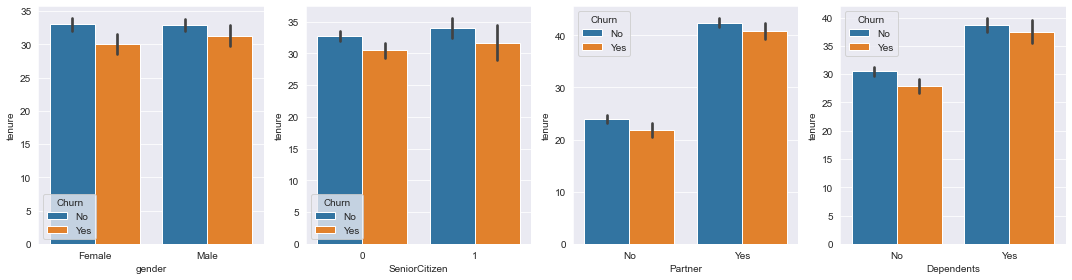

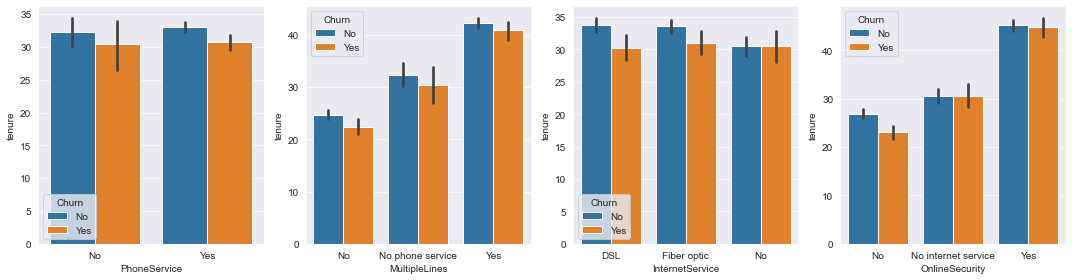

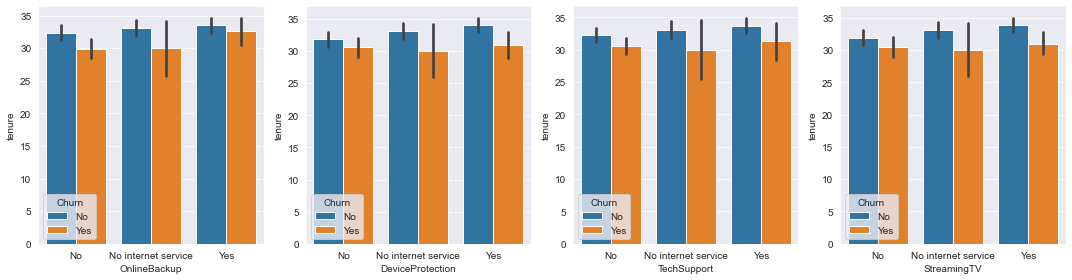

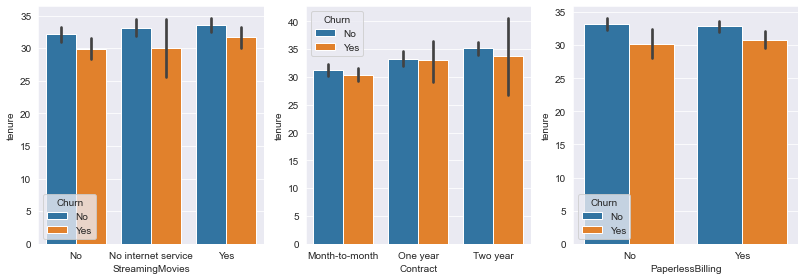

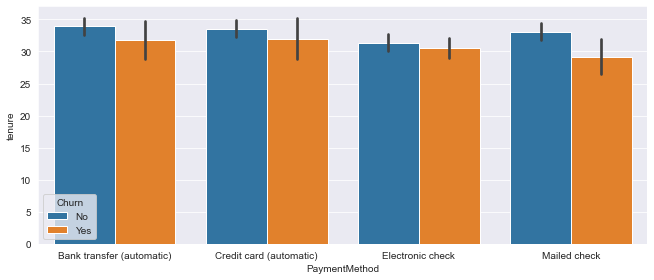

In [108]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='tenure',x='gender',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='tenure',x='SeniorCitizen',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='tenure',x='Partner',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='tenure',x='Dependents',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='tenure',x='PhoneService',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='tenure',x='MultipleLines',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='tenure',x='InternetService',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='tenure',x='OnlineSecurity',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='tenure',x='OnlineBackup',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='tenure',x='DeviceProtection',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='tenure',x='TechSupport',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='tenure',x='StreamingTV',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='tenure',x='StreamingMovies',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='tenure',x='Contract',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='tenure',x='PaperlessBilling',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

plt.figure(figsize=(35,4))
plt.subplot(1, 4, 1)
sns.barplot(y='tenure',x='PaymentMethod',hue='Churn',data=datacat);
plt.ylabel('tenure')
plt.tight_layout()

The above plot is 'tenure' continuous attribute vs all categorical attributes. Customer tenure is the length of time since the beginning of the customer relationship.

* gender - In both male and female customers, the customers with higher tenure have lower churn rate.


* SeniorCitizen - Senior citizens with higher tenure are more likely to churn than non senior citizens


* Partner - customers with partners are more likely to churn than without partners


* Dependents -  customers with dependents are more likely to churn than without dependents


* PhoneService - customers with phoneservice are more likely to churn than without phoneservice 


* MultipleLines - customers with MultipleLines are more likely to churn than without MultipleLines 


* InternetService - customers with InternetService are more likely to churn than without InternetService 


* OnlineSecurity -  customers with OnlineSecurity are more likely to churn than without OnlineSecurity 


* OnlineBackup - customers with OnlineBackup are more likely to churn than without OnlineBackup 


* DeviceProtection - customers with DeviceProtection are more likely to churn than without DeviceProtection 


* TechSupport - customers that used TechSupport are more likely to churn than those that havent used TechSupport


* StreamingTV - customers with StreamingTV are more likely to churn than without StreamingTV 


* StreamingMovies - customers that StreamingMovies are more likely to churn than those that StreamingMovies


* Contract - customers that have Year-to-year contracts are more likely to churn than those that have Month-to-Month


* PaperlessBilling - customers with and without paperless billing have equal churn rate.


* PaymentMethod - customers with Automatic payment methods are more likely to churn compared to customers with Non Automatic payment methods.

**MonthlyCharges vs Categorical attributes and Churn target as hue**

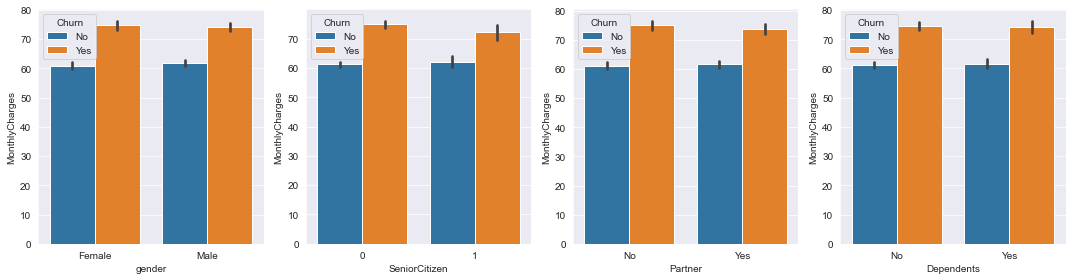

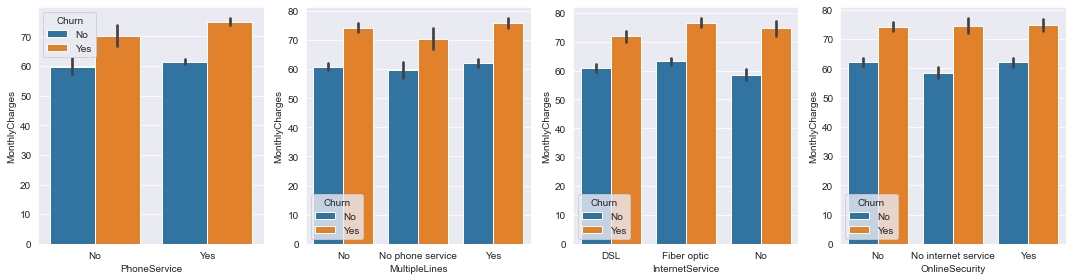

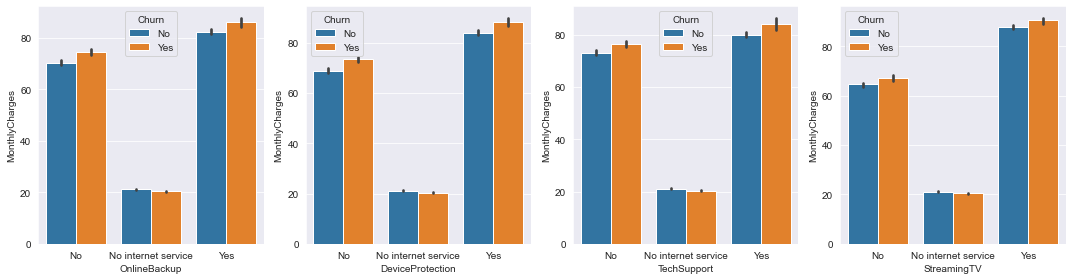

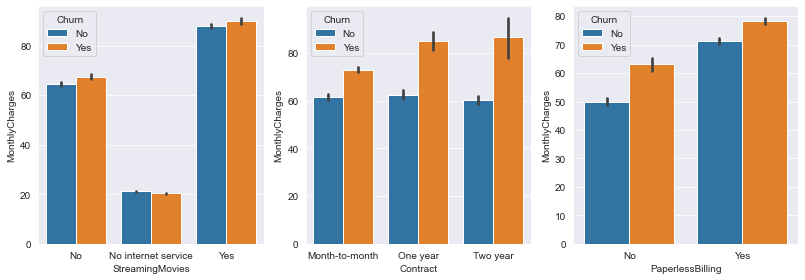

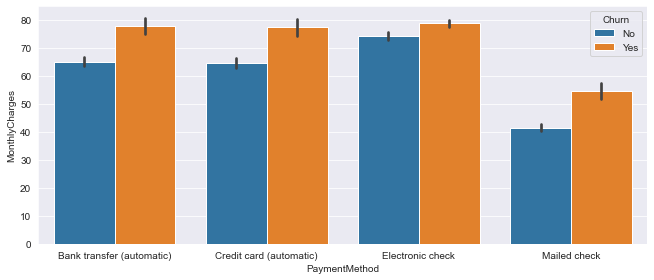

In [109]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyCharges',x='gender',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyCharges',x='SeniorCitizen',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='MonthlyCharges',x='Partner',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='MonthlyCharges',x='Dependents',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyCharges',x='PhoneService',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyCharges',x='MultipleLines',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='MonthlyCharges',x='InternetService',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='MonthlyCharges',x='OnlineSecurity',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyCharges',x='OnlineBackup',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyCharges',x='DeviceProtection',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='MonthlyCharges',x='TechSupport',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='MonthlyCharges',x='StreamingTV',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyCharges',x='StreamingMovies',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyCharges',x='Contract',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='MonthlyCharges',x='PaperlessBilling',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()


plt.figure(figsize=(35,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyCharges',x='PaymentMethod',hue='Churn',data=datacat);
plt.ylabel('MonthlyCharges')
plt.tight_layout()

The above plot is 'MonthlyCharges' continuous attribute vs all categorical attributes. MonthlyCharges is the amount that is charged monthly by the service.

* gender - In both male and female customers it is equal, the customers with monthly charges have higher churn rate


* SeniorCitizen - Senior citizens with monthlycharges are more likely to churn


* Partner - customers with partners are more likely to churn than without partners having monthly charges


* Dependents -  customers without dependents are more likely to churn than with dependents having monthlycharges


* PhoneService - customers having monthly charges with phoneservice are more likely to churn than without phoneservice 


* MultipleLines - customers having monthly charges with MultipleLines are more likely to churn than without MultipleLines 


* InternetService - customers having monthly charges with InternetService are more likely to churn than without InternetService 


* OnlineSecurity -  customers with and without OnlineSecurity are both likely to churn having monthly charges


* OnlineBackup - customers having monthly charges with OnlineBackup are more likely to churn than without OnlineBackup 


* DeviceProtection - customers having monthly charges with DeviceProtection are more likely to churn than without DeviceProtection 


* TechSupport - customers having monthly charges that used TechSupport are more likely to churn than those that havent used TechSupport


* StreamingTV - customers having monthly charges with StreamingTV are more likely to churn than without StreamingTV 


* StreamingMovies - customers having monthly charges that StreamingMovies are more likely to churn than those that StreamingMovies


* Contract - customers having monthly charges that have Year-to-year contracts are more likely to churn than those that have Month-to-Month


* PaperlessBilling  - customers having monthly charges with and without paperless billing have equal churn rate.


* PaymentMethod - customers having monthly charges with Automatic payment methods are more likely to churn compared to customers with Non Automatic payment methods.

**TotalCharges vs Categorical attributes and Churn target as hue**

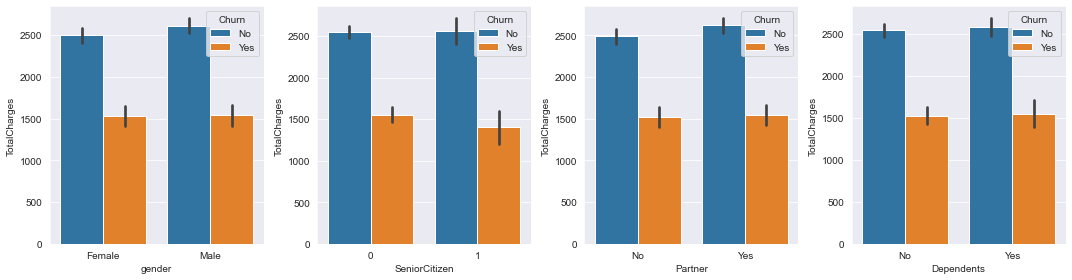

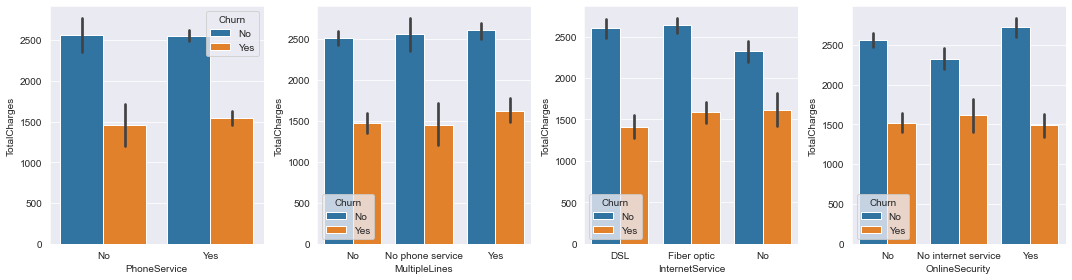

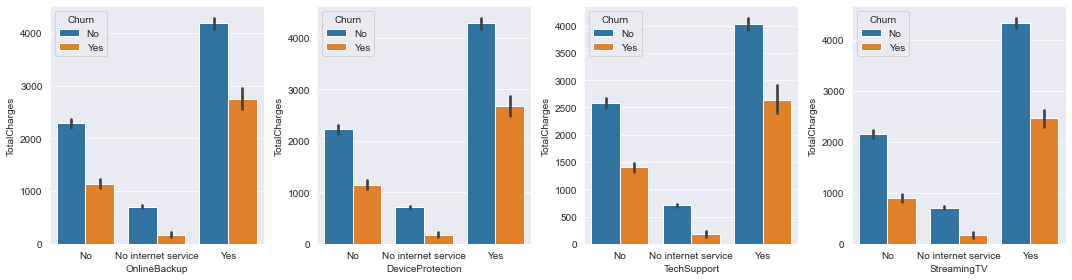

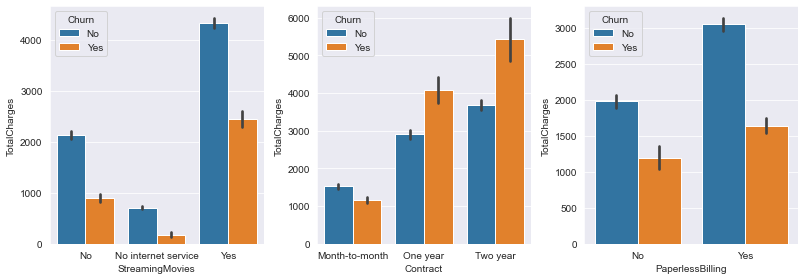

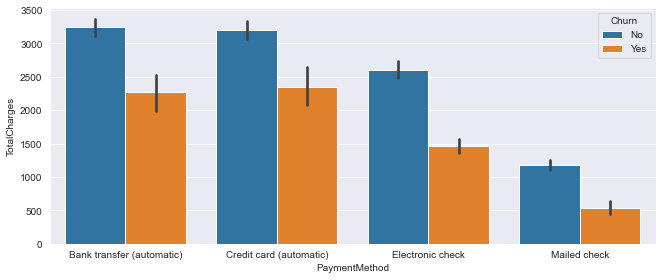

In [110]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='TotalCharges',x='gender',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='TotalCharges',x='SeniorCitizen',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='TotalCharges',x='Partner',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='TotalCharges',x='Dependents',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='TotalCharges',x='PhoneService',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='TotalCharges',x='MultipleLines',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='TotalCharges',x='InternetService',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='TotalCharges',x='OnlineSecurity',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='TotalCharges',x='OnlineBackup',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='TotalCharges',x='DeviceProtection',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='TotalCharges',x='TechSupport',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='TotalCharges',x='StreamingTV',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='TotalCharges',x='StreamingMovies',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='TotalCharges',x='Contract',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='TotalCharges',x='PaperlessBilling',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()


plt.figure(figsize=(35,4))
plt.subplot(1, 4, 1)
sns.barplot(y='TotalCharges',x='PaymentMethod',hue='Churn',data=datacat);
plt.ylabel('TotalCharges')
plt.tight_layout()

The above plot is 'TotalCharges' continuous attribute vs all categorical attributes. TotalCharges is the total amount charged by the service uptil date

* gender - In both male and female customers it is equal, the customers with TotalCharges have higher churn rate


* SeniorCitizen - Senior citizens with higher TotalCharges are more likely to churn


* Partner - customers having higher TotalCharges with partners are more likely to churn than without partners


* Dependents -  customers with dependents are more likely to churn than without dependents with TotalCharges


* PhoneService - customers having higher TotalCharges with phoneservice are more likely to churn than without phoneservice 


* MultipleLines - customers having higher TotalCharges with MultipleLines are more likely to churn than without MultipleLines 


* InternetService - customers having higher TotalCharges with InternetService are more likely to churn than without InternetService 


* OnlineSecurity -  customers with and without OnlineSecurity are both likely to churn having higher TotalCharges


* OnlineBackup - customers having higher TotalCharges with OnlineBackup are more likely to churn than without OnlineBackup 


* DeviceProtection - customers having higher TotalCharges with DeviceProtection are more likely to churn than without DeviceProtection 


* TechSupport - customers having higher TotalCharges that used TechSupport are more likely to churn than those that havent used TechSupport


* StreamingTV - customers having higher TotalCharges with StreamingTV are more likely to churn than without StreamingTV 


* StreamingMovies - customers having higher TotalCharges that StreamingMovies are more likely to churn than those that StreamingMovies


* Contract - customers having higher TotalCharges that have Year-to-year contracts are more likely to churn than those that have Month-to-Month


* PaperlessBilling  - customers having higher TotalCharges with and without paperless billing have equal churn rate.


* PaymentMethod - customers having higher TotalCharges with Automatic payment methods are more likely to churn compared to customers with Non Automatic payment methods.

### b) Correlation Heatmap

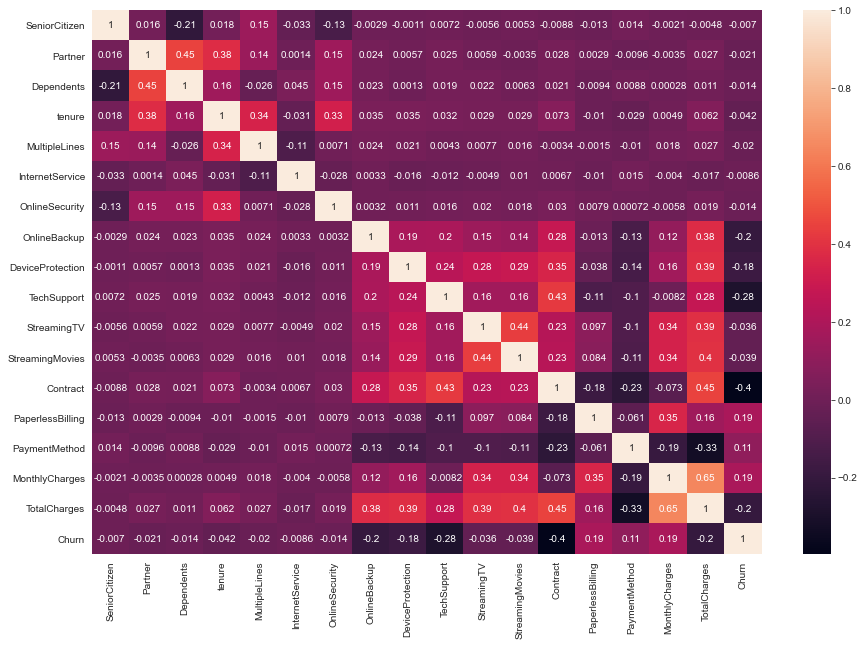

In [111]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(dfmodel.corr(),annot=True)
plt.show()

* This is the correlation of the dataset which will be used for the model ('dfmodel') where gender and phone services were removed as they are insiginifcant for model predictions.


* Tenure is highly correlated with TotalCharges and Contract


* MonthlyCharges is highly correlated with InternetService, StreamingTV, StreamingMovies

### c) Correlation plot with Churn

<AxesSubplot:>

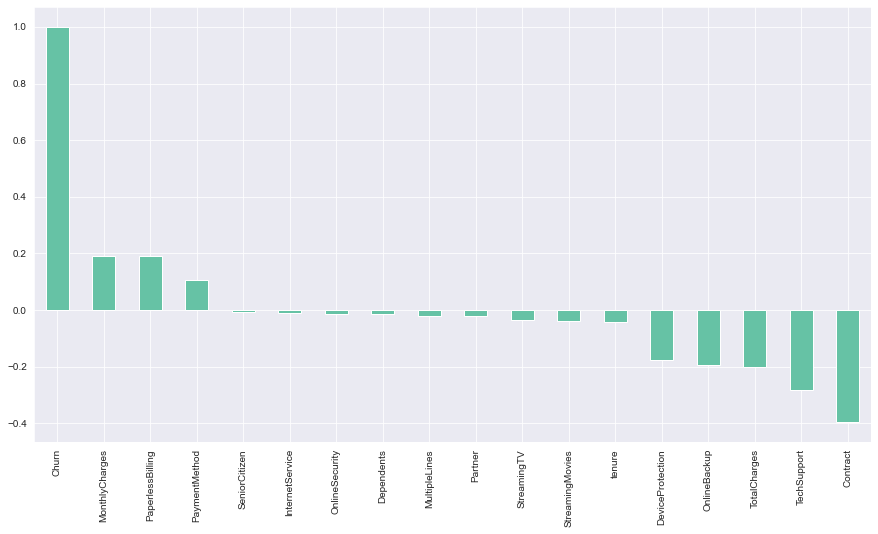

In [112]:
plt.figure(figsize=(15,8))
dfmodel.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* From this plot, we can tell that Device protection, Online Backup, Partner, Dependents, Techsupport, OnlineSecurity, TotalCharges, tenure and contact are negatively corrrelated with 'Churn' Target attribute

<font size="5"><p style="color:black"> <b> 4. Data pre-processing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Segregate predictors vs target attributes.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.1 Data segregation of Target and Predictor attributes

In [113]:
# Arrange data into independent variables and dependent variables
y = dfmodel['Churn'].values
X1 = dfmodel.drop(columns = ['Churn','tenure','MonthlyCharges','TotalCharges'])
X2 = datanum

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.2 Min-Max Scaling/Normalisation of target and predictor attributes

In [114]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X2.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X2)
X2 = pd.DataFrame(scaler.transform(X2))
X2.columns = features

In [115]:
X = pd.merge(X1,X2,left_index=True, right_index=True)

In [116]:
X

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0.013889,0.118812,0.001269
1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,0.472222,0.386139,0.215901
2,0,0,0,0,0,2,2,0,0,0,0,0,1,3,0.027778,0.356436,0.010270
3,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.625000,0.237624,0.210247
4,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0.027778,0.524752,0.015347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,0,0,0,2,2,2,2,1,1,3,0.180556,0.663366,0.227556
7028,0,1,0,0,0,0,2,2,0,2,2,1,1,1,0.944444,0.841584,0.847450
7029,1,0,0,1,0,0,0,0,0,0,0,0,1,2,0.083333,0.118812,0.037734
7030,0,0,0,0,2,1,0,0,0,0,0,0,1,3,0.027778,0.554455,0.033233


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Check for target balancing and fix it if found imbalanced.

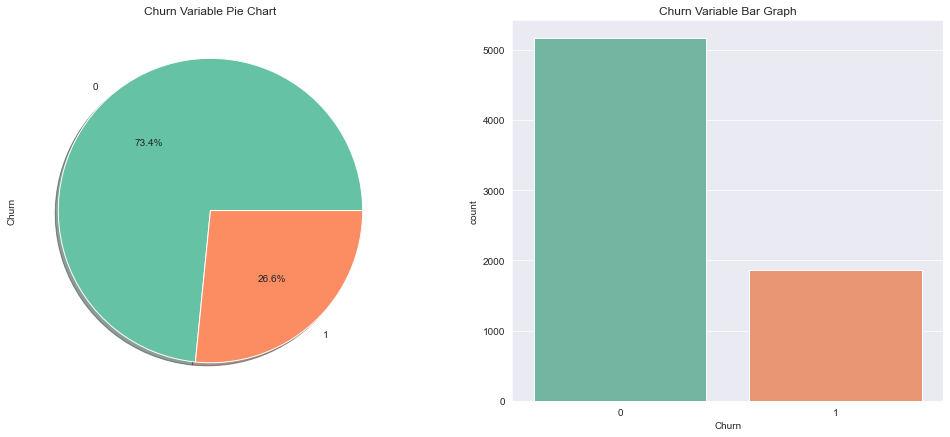

In [117]:
f,axes=plt.subplots(1,2,figsize=(17,7))
dfmodel['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Churn',data=dfmodel,ax=axes[1],order=[0,1])
axes[0].set_title('Churn Variable Pie Chart')
axes[1].set_title('Churn Variable Bar Graph')
plt.show()

In [118]:
target_count = dfmodel.Churn.value_counts()
print('Not Churn - 0:', target_count[0],'\n')
print('Churn - 1:', target_count[1],'\n')

print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

Not Churn - 0: 5163 

Churn - 1: 1869 

Proportion: 2.7624 : 1


From this it is understandable that the target variable is unevenly distributed where Not Churn - 0 has 73.4% whileChurn - 1 has 26.6%, so majority of the data would assume Not Churn. That is around 5163  for Not Churn and 1869  for Churn. 

If minority is within this percentage, then it is considered as imbalanced, but the levels are as follows :   <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.     
    
>mild ---> 20-40% of the data set
    
>Moderate ---> 1-20% of the data set
    
>Extreme ---> <1% of the data set 
                 
In this case, the Churn target attribute is Mildly imbalanced at 26.6% (between 20-40%) and is not required to get treated for modelling.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.3 Perform train-test split.

In [119]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, test_size=0.30, random_state=10)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.3 Check if the train and test data have similar statistical characteristics when compared with original data.

In [120]:
X_train.shape # 70%

(4922, 17)

In [121]:
X_test.shape # 30%

(2110, 17)

In [122]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4922.0,0.164770,0.371011,0.0,0.000000,0.000000,0.000000,1.000000
Partner,4922.0,0.490045,0.499952,0.0,0.000000,0.000000,1.000000,1.000000
Dependents,4922.0,0.300691,0.458605,0.0,0.000000,0.000000,1.000000,1.000000
MultipleLines,4922.0,0.943316,0.949356,0.0,0.000000,1.000000,2.000000,2.000000
InternetService,4922.0,0.871597,0.739740,0.0,0.000000,1.000000,1.000000,2.000000
OnlineSecurity,4922.0,0.791751,0.859761,0.0,0.000000,1.000000,2.000000,2.000000
OnlineBackup,4922.0,0.910809,0.881502,0.0,0.000000,1.000000,2.000000,2.000000
DeviceProtection,4922.0,0.913653,0.881786,0.0,0.000000,1.000000,2.000000,2.000000
TechSupport,4922.0,0.805973,0.864493,0.0,0.000000,1.000000,2.000000,2.000000
StreamingTV,4922.0,0.994108,0.885984,0.0,0.000000,1.000000,2.000000,2.000000


In [123]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2110.0,0.155924,0.362869,0.000000,0.000000,0.000000,0.000000,1.0
Partner,2110.0,0.467299,0.499048,0.000000,0.000000,0.000000,1.000000,1.0
Dependents,2110.0,0.297156,0.457114,0.000000,0.000000,0.000000,1.000000,1.0
MultipleLines,2110.0,0.933175,0.947052,0.000000,0.000000,1.000000,2.000000,2.0
InternetService,2110.0,0.876303,0.734155,0.000000,0.000000,1.000000,1.000000,2.0
OnlineSecurity,2110.0,0.785782,0.859823,0.000000,0.000000,1.000000,2.000000,2.0
OnlineBackup,2110.0,0.894313,0.877902,0.000000,0.000000,1.000000,2.000000,2.0
DeviceProtection,2110.0,0.881043,0.876202,0.000000,0.000000,1.000000,2.000000,2.0
TechSupport,2110.0,0.773934,0.854843,0.000000,0.000000,0.000000,2.000000,2.0
StreamingTV,2110.0,0.963507,0.883490,0.000000,0.000000,1.000000,2.000000,2.0


In [124]:
X_test.skew() 

SeniorCitizen       1.898216
Partner             0.131180
Dependents          0.888338
MultipleLines       0.133452
InternetService     0.197686
OnlineSecurity      0.426143
OnlineBackup        0.206825
DeviceProtection    0.233096
TechSupport         0.450229
StreamingTV         0.071111
StreamingMovies     0.011999
Contract            0.665288
PaperlessBilling   -0.314950
PaymentMethod      -0.213540
tenure              0.234220
MonthlyCharges     -0.201326
TotalCharges        1.045884
dtype: float64

In [125]:
X_train.skew()

SeniorCitizen       1.807849
Partner             0.039841
Dependents          0.869551
MultipleLines       0.113121
InternetService     0.208784
OnlineSecurity      0.413286
OnlineBackup        0.174411
DeviceProtection    0.168812
TechSupport         0.384408
StreamingTV         0.011482
StreamingMovies     0.014649
Contract            0.622497
PaperlessBilling   -0.404745
PaymentMethod      -0.150595
tenure              0.241542
MonthlyCharges     -0.230991
TotalCharges        0.927515
dtype: float64

In [126]:
X_train.kurtosis()

SeniorCitizen       1.268834
Partner            -1.999225
Dependents         -1.244387
MultipleLines      -1.881369
InternetService    -1.153857
OnlineSecurity     -1.523007
OnlineBackup       -1.691101
DeviceProtection   -1.693332
TechSupport        -1.554398
StreamingTV        -1.726242
StreamingMovies    -1.726146
Contract           -1.287061
PaperlessBilling   -1.836928
PaymentMethod      -1.219660
tenure             -1.390495
MonthlyCharges     -1.250519
TotalCharges       -0.302709
dtype: float64

In [127]:
X_test.kurtosis()

SeniorCitizen       1.604744
Partner            -1.984674
Dependents         -1.212005
MultipleLines      -1.872829
InternetService    -1.128935
OnlineSecurity     -1.515410
OnlineBackup       -1.671838
DeviceProtection   -1.658354
TechSupport        -1.484462
StreamingTV        -1.715787
StreamingMovies    -1.721504
Contract           -1.213487
PaperlessBilling   -1.902611
PaymentMethod      -1.185392
tenure             -1.379794
MonthlyCharges     -1.267347
TotalCharges       -0.042043
dtype: float64

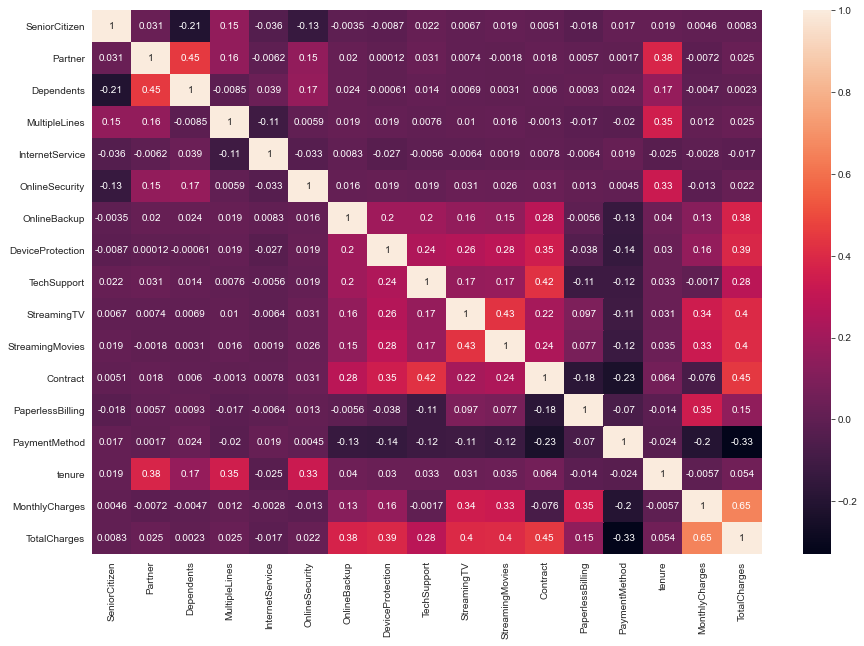

In [128]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

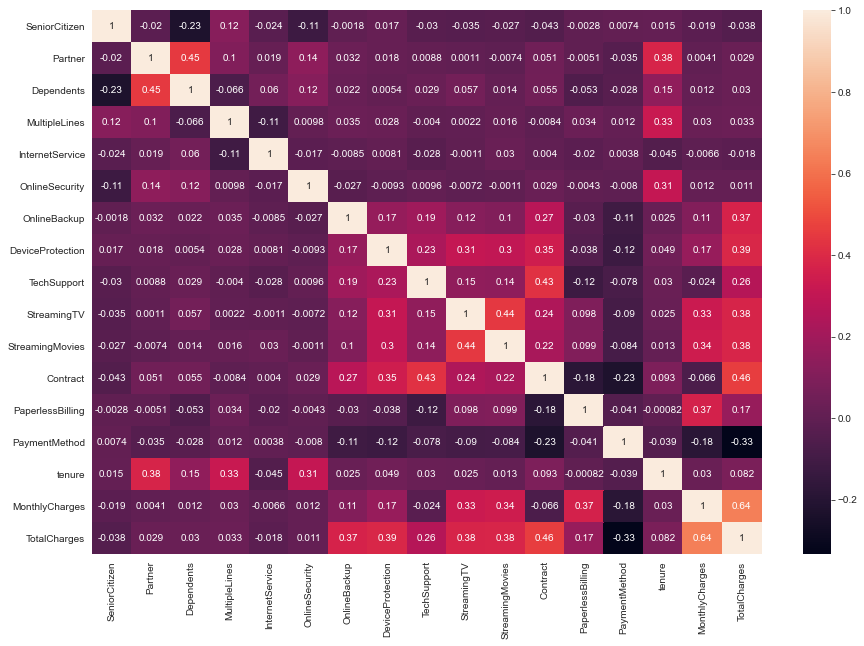

In [129]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(X_test.corr(),annot=True)
plt.show()

* The Test and Train datasets are very similar to one another and to the original dataset. The only difference is that this dataset is scaled and has insignificant attributes removed and is in different proportion of the original dataset. However, statistically they're identical.

<font size="5"><p style="color:black"> <b> 5. Model training, testing and tuning:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.1 Train and test all ensemble models taught in the learning module. 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#035096;">Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 Decision Tree Classifier

In [130]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(X_train, y_train)

prediction_tree_train = dTreeR.predict(X_train)
prediction_tree_test = dTreeR.predict(X_test)

dTreetrain = metrics.accuracy_score(y_train, prediction_tree_train)
dTreetest = metrics.accuracy_score(y_test, prediction_tree_test)

dTree_precision_train = precision_score(y_train, prediction_tree_train)
dTree_recall_train = recall_score(y_train, prediction_tree_train)

dTree_precision_test = precision_score(y_test, prediction_tree_test)
dTree_recall_test = recall_score(y_test, prediction_tree_test)

dTree_F1 = 2 * (dTree_precision_test * dTree_recall_test) / (dTree_precision_test + dTree_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth = 5, random_state=22)
model_rf = model_rf.fit(X_train, y_train)

# Make predictions
prediction_train = model_rf.predict(X_train)
prediction_test = model_rf.predict(X_test)
RFtrain = metrics.accuracy_score(y_train, prediction_train)
RFtest = metrics.accuracy_score(y_test, prediction_test)

RF_precision_train = precision_score(y_train, prediction_train)
RF_recall_train = recall_score(y_train, prediction_train)

RF_precision_test = precision_score(y_test, prediction_test)
RF_recall_test = recall_score(y_test, prediction_test)

RF_F1 = 2 * (RF_precision_test * RF_recall_test) / (RF_precision_test + RF_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.3 Adaboost Classifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB1 =abcl.predict(X_train)
pred_AB =abcl.predict(X_test)
ABTrain = metrics.accuracy_score(y_train, pred_AB1)
ABTest = metrics.accuracy_score(y_test, pred_AB)

AB_precision_train = precision_score(y_train, pred_AB1)
AB_recall_train = recall_score(y_train, pred_AB1)

AB_precision_test = precision_score(y_test, pred_AB)
AB_recall_test = recall_score(y_test, pred_AB)

AB_F1 = 2 * (AB_precision_test * AB_recall_test) / (AB_precision_test + AB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.4 Bagging Classifier

In [133]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= 70, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG1 =bgcl.predict(X_train)
pred_BG =bgcl.predict(X_test)
BGTrain = metrics.accuracy_score(y_train, pred_BG1)
BGTest = metrics.accuracy_score(y_test, pred_BG)

BG_precision_train = precision_score(y_train, pred_BG1)
BG_recall_train = recall_score(y_train, pred_BG1)

BG_precision_test = precision_score(y_test, pred_BG)
BG_recall_test = recall_score(y_test, pred_BG)

BG_F1 = 2 * (BG_precision_test * BG_recall_test) / (BG_precision_test + BG_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.5 Graident Boost Classifier

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB1 =gbcl.predict(X_train)
pred_GB =gbcl.predict(X_test)
GBTrain = metrics.accuracy_score(y_train, pred_GB1)
GBTest = metrics.accuracy_score(y_test, pred_GB)

GB_precision_train = precision_score(y_train, pred_GB1)
GB_recall_train = recall_score(y_train, pred_GB1)

GB_precision_test = precision_score(y_test, pred_GB)
GB_recall_test = recall_score(y_test, pred_GB)

GB_F1 = 2 * (GB_precision_test * GB_recall_test) / (GB_precision_test + GB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.6 LightGBM Classifier

In [135]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth = 3)
clf.fit(X_train, y_train)
pred_LGB1=clf.predict(X_train)
pred_LGB=clf.predict(X_test)
LGBTrain = metrics.accuracy_score(y_train, pred_LGB1)
LGBTest = metrics.accuracy_score(y_test, pred_LGB)

LGB_precision_train = precision_score(y_train, pred_LGB1)
LGB_recall_train = recall_score(y_train, pred_LGB1)

LGB_precision_test = precision_score(y_test, pred_LGB)
LGB_recall_test = recall_score(y_test, pred_LGB)

LGB_F1 = 2 * (LGB_precision_test * LGB_recall_test) / (LGB_precision_test + LGB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.7 XGBoost Classifier

In [136]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(max_depth=3, eval_metric='mlogloss') 
xgbc.fit(X_train, y_train)
pred_XGB1 = xgbc.predict(X_train)
pred_XGB = xgbc.predict(X_test)
XGBTrain = metrics.accuracy_score(y_train, pred_XGB1)
XGBTest = metrics.accuracy_score(y_test, pred_XGB)

XGB_precision_train = precision_score(y_train, pred_XGB1)
XGB_recall_train = recall_score(y_train, pred_XGB1)

XGB_precision_test = precision_score(y_test, pred_XGB)
XGB_recall_test = recall_score(y_test, pred_XGB)

XGB_F1 = 2 * (XGB_precision_test * XGB_recall_test) / (XGB_precision_test + XGB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.8 CatBoost Classifier

In [137]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=5)
cat.fit(X_train, y_train, verbose=False)
pred_cat1 = cat.predict(X_train)
pred_cat = cat.predict(X_test)
CatTrain = metrics.accuracy_score(y_train, pred_cat1)
CatTest = metrics.accuracy_score(y_test, pred_cat)

Cat_precision_train = precision_score(y_train, pred_cat1)
Cat_recall_train = recall_score(y_train, pred_cat1)

Cat_precision_test = precision_score(y_test, pred_cat)
Cat_recall_test = recall_score(y_test, pred_cat)

Cat_F1 = 2 * (Cat_precision_test * Cat_recall_test) / (Cat_precision_test + Cat_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.2 Display the classification accuracies for train and test data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.1 All Classification accuracies for Test and Train data

In [138]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [dTreetrain],'accuracy_Test': [dTreetest],'Precision_Train': [dTree_precision_train],'Precision_Test':[dTree_precision_test],'Recall_Train':[dTree_recall_train],'Recall_Test':[dTree_recall_test], 'F1-Score':[dTree_F1]})
resultsDf = resultsDf[['Method', 'accuracy_Train','accuracy_Test','Precision_Train','Precision_Test','Recall_Train','Recall_Test','F1-Score']]
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy_Train': [RFtrain],'accuracy_Test': [RFtest],'Precision_Train': [RF_precision_train],'Precision_Test':[RF_precision_test],'Recall_Train':[RF_recall_train],'Recall_Test':[RF_recall_test], 'F1-Score':[RF_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy_Train': [ABTrain],'accuracy_Test': [ABTest],'Precision_Train': [AB_precision_train],'Precision_Test':[AB_precision_test],'Recall_Train':[AB_recall_train],'Recall_Test':[AB_recall_test], 'F1-Score':[AB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy_Train': [BGTrain],'accuracy_Test': [BGTest],'Precision_Train': [BG_precision_train],'Precision_Test':[BG_precision_test],'Recall_Train':[BG_recall_train],'Recall_Test':[BG_recall_test], 'F1-Score':[BG_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['GraidentBoost'], 'accuracy_Train': [GBTrain],'accuracy_Test': [GBTest],'Precision_Train': [GB_precision_train],'Precision_Test':[GB_precision_test],'Recall_Train':[GB_recall_train],'Recall_Test':[GB_recall_test], 'F1-Score':[GB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['LightGBM'], 'accuracy_Train': [LGBTrain],'accuracy_Test': [LGBTest],'Precision_Train': [LGB_precision_train],'Precision_Test':[LGB_precision_test],'Recall_Train':[LGB_recall_train],'Recall_Test':[LGB_recall_test], 'F1-Score':[LGB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['XGBoost'], 'accuracy_Train': [XGBTrain],'accuracy_Test': [XGBTest],'Precision_Train': [XGB_precision_train],'Precision_Test':[XGB_precision_test],'Recall_Train':[XGB_recall_train],'Recall_Test':[XGB_recall_test], 'F1-Score':[XGB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['CatBoost'], 'accuracy_Train': [CatTrain],'accuracy_Test': [CatTest],'Precision_Train': [Cat_precision_train],'Precision_Test':[Cat_precision_test],'Recall_Train':[Cat_recall_train],'Recall_Test':[Cat_recall_test], 'F1-Score':[Cat_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,0.775701,0.767299,0.566796,0.550296,0.667176,0.665474,0.602429
0,Random Forest,0.798050,0.793839,0.708443,0.683432,0.409924,0.413238,0.515050
0,Adaboost,0.802316,0.793365,0.657330,0.629474,0.537405,0.534884,0.578337
0,Bagging,0.792361,0.791943,0.700557,0.679641,0.383969,0.406082,0.508399
0,GraidentBoost,0.825681,0.795735,0.732033,0.640969,0.544275,0.520572,0.574531
0,LightGBM,0.821008,0.798104,0.713858,0.645514,0.546565,0.527728,0.580709
0,XGBoost,0.849858,0.792417,0.767072,0.620278,0.625954,0.558140,0.587571
0,CatBoost,0.805567,0.798578,0.686772,0.661058,0.495420,0.491950,0.564103


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.2 ROC curve

In [139]:
def plot_roc_curve1(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Decision Tree Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve2(fpr1, tpr1):
    plt.plot(fpr1, tpr1, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Random Forest Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve3(fpr2, tpr2):
    plt.plot(fpr2, tpr2, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Adaboost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve4(fpr3, tpr3):
    plt.plot(fpr3, tpr3, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Bagging Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve5(fpr4, tpr4):
    plt.plot(fpr4, tpr4, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Graident Boost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve6(fpr5, tpr5):
    plt.plot(fpr5, tpr5, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for LightGBM  Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve7(fpr6, tpr6):
    plt.plot(fpr6, tpr6, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for XGBoost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve8(fpr7, tpr7):
    plt.plot(fpr7, tpr7, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for CatBoost Classifier')
    plt.legend()
    plt.show()

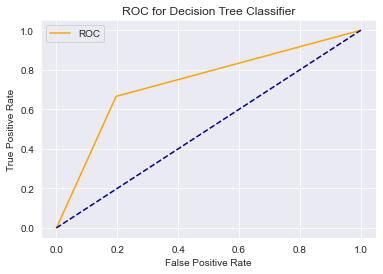

Area under the curve:  0.7347357409207977


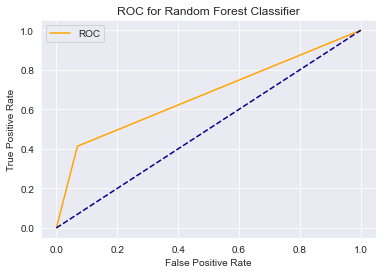

Area under the curve:  0.6721250875135092


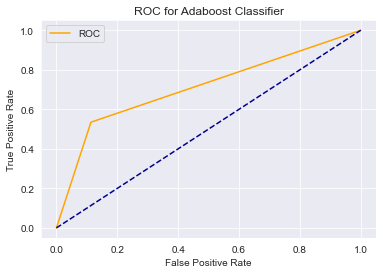

Area under the curve:  0.7107042718126342


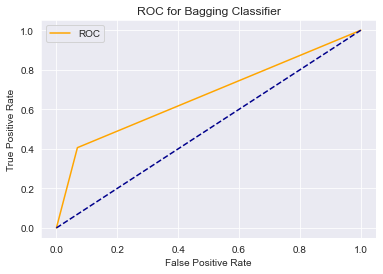

Area under the curve:  0.6685472699822033


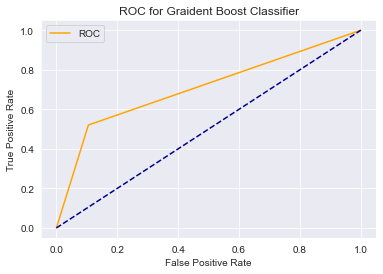

Area under the curve:  0.7077394813663987


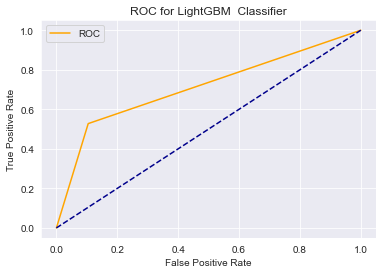

Area under the curve:  0.7116396715605028


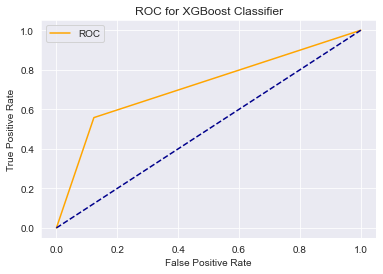

Area under the curve:  0.7174965888474053


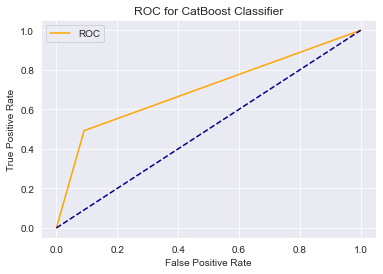

Area under the curve:  0.7005204098227353


In [140]:
# Loading the probability values for positive class
y_prob = dTreeR.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_tree_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))



# Loading the probability values for positive class
y_prob = model_rf.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, prediction_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve2(fpr1, tpr1)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr1, tpr1))



# Loading the probability values for positive class
y_prob = abcl.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, pred_AB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve3(fpr2, tpr2)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr2, tpr2))



# Loading the probability values for positive class
y_prob = bgcl.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, pred_BG, pos_label=1)
# Plotting the ROC curve
plot_roc_curve4(fpr3, tpr3)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr3, tpr3))



# Loading the probability values for positive class
y_prob = gbcl.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, pred_GB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve5(fpr4, tpr4)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr4, tpr4))



# Loading the probability values for positive class
y_prob = clf.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr5, tpr5, thresholds = metrics.roc_curve(y_test, pred_LGB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve6(fpr5, tpr5)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr5, tpr5))



# Loading the probability values for positive class
y_prob = xgbc.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr6, tpr6, thresholds = metrics.roc_curve(y_test, pred_XGB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve7(fpr6, tpr6)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr6, tpr6))



# Loading the probability values for positive class
y_prob = cat.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr7, tpr7, thresholds = metrics.roc_curve(y_test, pred_cat, pos_label=1)
# Plotting the ROC curve
plot_roc_curve8(fpr7, tpr7)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr7, tpr7))

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.3 Confusion Matrix

Text(0.5, 1.0, 'CatBoost Classifier')

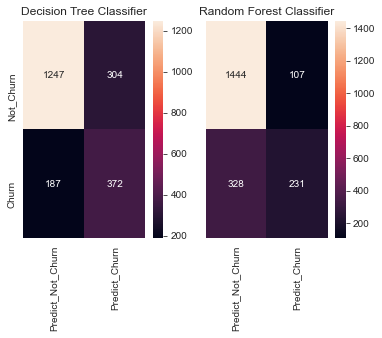

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

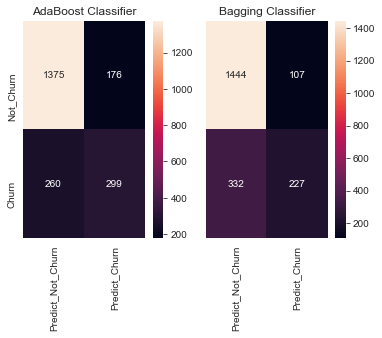

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

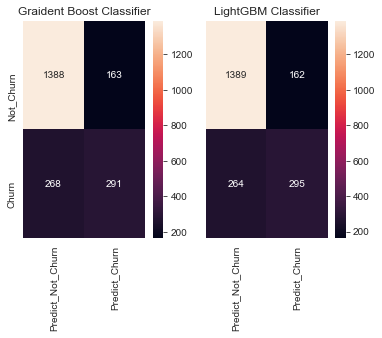

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

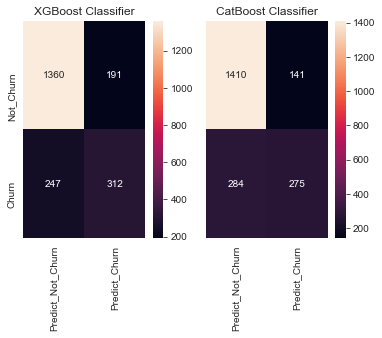

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [141]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
cm=metrics.confusion_matrix(y_test, prediction_tree_test)
df_cm = pd.DataFrame(cm, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7,5))
g = sns.heatmap(df_cm, annot=True, fmt='g', ax=ax1 )
ax1.set_title('Decision Tree Classifier')

cm1=metrics.confusion_matrix(y_test, prediction_test)
df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7,5))
g1 = sns.heatmap(df_cm1, annot=True, fmt='g', ax=ax2)
ax2.set_title('Random Forest Classifier')



f1,(ax3,ax4) = plt.subplots(1,2,sharey=True)
cm2=metrics.confusion_matrix(y_test, pred_AB)
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g2 = sns.heatmap(df_cm2, annot=True, fmt='g', ax=ax3)
ax3.set_title('AdaBoost Classifier')

cm3=metrics.confusion_matrix(y_test, pred_BG)
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g3 = sns.heatmap(df_cm3, annot=True, fmt='g', ax=ax4)
ax4.set_title('Bagging Classifier')



f2,(ax5,ax6) = plt.subplots(1,2,sharey=True)
cm4=metrics.confusion_matrix(y_test, pred_GB)
df_cm4 = pd.DataFrame(cm4, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g4 = sns.heatmap(df_cm4, annot=True, fmt='g', ax=ax5)
ax5.set_title('Graident Boost Classifier')

cm5=metrics.confusion_matrix(y_test, pred_LGB)
df_cm5 = pd.DataFrame(cm5, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g5 = sns.heatmap(df_cm5, annot=True, fmt='g', ax=ax6)
ax6.set_title('LightGBM Classifier')



f3,(ax7,ax8) = plt.subplots(1,2,sharey=True)
cm6=metrics.confusion_matrix(y_test, pred_XGB)
df_cm6 = pd.DataFrame(cm6, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g6 = sns.heatmap(df_cm6, annot=True, fmt='g', ax=ax7)
ax7.set_title('XGBoost Classifier')

cm7=metrics.confusion_matrix(y_test, pred_cat)
df_cm7 = pd.DataFrame(cm7, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g7 = sns.heatmap(df_cm7, annot=True, fmt='g', ax=ax8)
ax8.set_title('CatBoost Classifier')


True Positives (TP): we correctly predicted "Bottom right" True positives (Churn to Predict_Churn)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Not_Churn to Predict_Not_Churn)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the customers were predicted as not churned but they actually Churned.

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the customers were predicted as Churned but did not Churn.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.3 Apply all the possible tuning techniques to train the best model for the given data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#035096;">Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.1 Hyperparameter tuning of Decision Tree Classifier

**Using GridSearchCV to estimate the best parameters for Decision Tree Classifier**

In [142]:
from scipy.stats import randint
from sklearn import decomposition, datasets
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": range(1,9),
              "min_samples_leaf": range(1,9),
              "criterion": ["gini", "entropy"]
             }

HYPdTreeR_CV =  GridSearchCV(dTreeR,parameters,cv=5)
HYPdTreeR_CV1 = HYPdTreeR_CV.fit(X,y)
print("Tuned Decision Tree Parameters: {}".format(HYPdTreeR_CV1.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}


**Best Parameters in DecisionTreeClassifier model**

In [143]:
TunedTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 5, random_state=1)
TunedTreeR.fit(X_train, y_train)
prediction_Tunedtree_train = TunedTreeR.predict(X_train)
prediction_Tunedtree_test = TunedTreeR.predict(X_test)

TunedTreetrain = metrics.accuracy_score(y_train, prediction_Tunedtree_train)
TunedTreetest = metrics.accuracy_score(y_test, prediction_Tunedtree_test)

Tunedtree_precision_train = precision_score(y_train, prediction_Tunedtree_train)
Tunedtree_recall_train = recall_score(y_train, prediction_Tunedtree_train)

Tunedtree_precision_test = precision_score(y_test, prediction_Tunedtree_test)
Tunedtree_recall_test = recall_score(y_test, prediction_Tunedtree_test)

Tuned_dTree_F1 = 2 * (Tunedtree_precision_test * Tunedtree_recall_test) / (Tunedtree_precision_test + Tunedtree_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.2 Hyperparameter tuning of Random Forest Classifier

**Using RandomizedSearchCV to estimate the best parameters for Random Forest Classifier**

In [144]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
               'max_depth': [20,40,60,80,100],
               'min_samples_leaf': [1, 2, 4],
               'n_estimators' : [2000], 
                'max_features': ['auto', 'sqrt'], 
                'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100]
    
            }

rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state=42, n_jobs = -1)

rf_random1 = rf_random.fit(X,y)
print("Tuned Random  Forest Parameters: {}".format(rf_random1.best_params_))

Tuned Random  Forest Parameters: {'n_estimators': 2000, 'min_samples_leaf': 4, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 40}


**Best Parameters in Random Forest Classifier model**

* After RandomizedSearchCV, manual adjustments were performed to get better accuracy, the adjustments are the following: min_samples_leaf =2, max_leaf_nodes = 88, and max_depth = 100

In [145]:
rf_Tuned = RandomForestClassifier(n_estimators = 2000, max_depth = 100,min_samples_leaf =2, max_leaf_nodes =88,max_features = 'sqrt', random_state=22)
rf_Tuned = rf_Tuned.fit(X_train, y_train)

# Make predictions
Pred_rfTuned_train = rf_Tuned.predict(X_train)
Pred_rfTuned_test = rf_Tuned.predict(X_test)
RFTunedtrain = metrics.accuracy_score(y_train, Pred_rfTuned_train)
RFTunedtest = metrics.accuracy_score(y_test, Pred_rfTuned_test)

RFTuned_precision_train = precision_score(y_train, Pred_rfTuned_train)
RFTuned_recall_train = recall_score(y_train, Pred_rfTuned_train)

RFTuned_precision_test = precision_score(y_test, Pred_rfTuned_test)
RFTuned_recall_test = recall_score(y_test, Pred_rfTuned_test)

Tuned_RF_F1 = 2 * (RFTuned_precision_test * RFTuned_recall_test) / (RFTuned_precision_test + RFTuned_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.3 Hyperparameter tuning of Adaboost Classifier

**Using GridSearchCV to estimate the best parameters for Adaboost Classifier**

In [146]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=abcl, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Tuned Adaboost Parameters: {}".format(grid_result.best_params_))

Tuned Adaboost Parameters: {'learning_rate': 0.1, 'n_estimators': 500}


**Best Parameters in AdaBoost Classifier model**

In [147]:
from sklearn.ensemble import AdaBoostClassifier
Tuned_ada = AdaBoostClassifier(n_estimators= 500,learning_rate = 0.1, random_state=22)
Tuned_ada_fit = Tuned_ada.fit(X_train, y_train)
Tuned_pred_AB1 =Tuned_ada_fit.predict(X_train)
Tuned_pred_AB =Tuned_ada_fit.predict(X_test)
Tuned_ABTrain = metrics.accuracy_score(y_train, Tuned_pred_AB1)
Tuned_ABTest = metrics.accuracy_score(y_test, Tuned_pred_AB)

Tuned_AB_precision_train = precision_score(y_train, Tuned_pred_AB1)
Tuned_AB_recall_train = recall_score(y_train, Tuned_pred_AB1)

Tuned_AB_precision_test = precision_score(y_test, Tuned_pred_AB)
Tuned_AB_recall_test = recall_score(y_test, Tuned_pred_AB)

Tuned_AB_F1 = 2 * (Tuned_AB_precision_test * Tuned_AB_recall_test) / (Tuned_AB_precision_test + Tuned_AB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.4 Hyperparameter tuning of Bagging Classifier

**Using GridSearchCV to estimate the best parameters for Bagging Classifier**

In [148]:
n_estimators =  [200,400,600,800,1000]
# Number of features to consider at every split
max_samples = [100,200]
parameters = {'n_estimators': n_estimators,
               'max_samples': max_samples}

grid_search  = GridSearchCV(estimator = bgcl,param_grid = parameters)
grid_search.fit(X_train, y_train)
print("Tuned Bagging Parameters: {}".format(grid_search.best_params_))

Tuned Bagging Parameters: {'max_samples': 200, 'n_estimators': 400}


**Best Parameters in Bagging Classifier model**

In [149]:
Tuned_bgcl = BaggingClassifier(n_estimators=400, max_samples= 200, random_state=22)
Tuned_bgcl_fit = Tuned_bgcl.fit(X_train, y_train)
Tuned_pred_BG1 =Tuned_bgcl_fit.predict(X_train)
Tuned_pred_BG =Tuned_bgcl_fit.predict(X_test)
Tuned_BGTrain = metrics.accuracy_score(y_train, Tuned_pred_BG1)
Tuned_BGTest = metrics.accuracy_score(y_test, Tuned_pred_BG)

Tuned_BG_precision_train = precision_score(y_train, Tuned_pred_BG1)
Tuned_BG_recall_train = recall_score(y_train, Tuned_pred_BG1)

Tuned_BG_precision_test = precision_score(y_test, Tuned_pred_BG)
Tuned_BG_recall_test = recall_score(y_test, Tuned_pred_BG)

Tuned_BG_F1 = 2 * (Tuned_BG_precision_test * Tuned_BG_recall_test) / (Tuned_BG_precision_test + Tuned_BG_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.5 Hyperparameter tuning of Gradient Boost Classifier

**Using GridSearchCV to estimate the best parameters for Gradient Boost Classifier**

In [150]:
parameters = {
    "n_estimators":[100,200,300,400,500],
    'min_samples_leaf': [100,150],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
}

gridSearch_GBC = GridSearchCV(estimator = gbcl,param_grid = parameters, n_jobs =  -1)
gridSearch_GBC.fit(X_train, y_train)
print("Tuned Graident Boost Parameters: {}".format(gridSearch_GBC.best_params_))

Tuned Graident Boost Parameters: {'learning_rate': 0.01, 'min_samples_leaf': 150, 'n_estimators': 500}


**Best Parameters in Gradient Boost Classifier model**

* After GridSearchCV, manual adjustments were performed to get better accuracy, the adjustments are the following: min_samples_leaf = 100 

In [151]:
Tuned_gbcl = GradientBoostingClassifier(learning_rate = 0.01, min_samples_leaf = 100, n_estimators = 500, random_state=22)
Tuned_gbcl.fit(X_train, y_train)
Tuned_pred_GB1 =Tuned_gbcl.predict(X_train)
Tuned_pred_GB =Tuned_gbcl.predict(X_test)
Tuned_GBTrain = metrics.accuracy_score(y_train, Tuned_pred_GB1)
Tuned_GBTest = metrics.accuracy_score(y_test, Tuned_pred_GB)

Tuned_GB_precision_train = precision_score(y_train, Tuned_pred_GB1)
Tuned_GB_recall_train = recall_score(y_train, Tuned_pred_GB1)

Tuned_GB_precision_test = precision_score(y_test, Tuned_pred_GB)
Tuned_GB_recall_test = recall_score(y_test, Tuned_pred_GB)

Tuned_GB_F1 = 2 * (Tuned_GB_precision_test * Tuned_GB_recall_test) / (Tuned_GB_precision_test + Tuned_GB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.6 Hyperparameter tuning of LightGBM Classifier

**Using RandomizedSearchCV to estimate the best parameters for LightGBM Classifier**

In [201]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import math
import sklearn

parameters = { 'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4],
               'num_leaves': range(1,20),
              'max_depth': range(1,9),
              'min_data_in_leaf': sp_randint(90, 120),
              'feature_fraction': sp_uniform(0.5, 0.8)
             }

grid_search_GBM = RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=5, n_iter = 200, verbose=2, random_state=42, n_jobs = -1)
grid_search_GBM.fit(X_train, y_train)
print("Tuned LightGBM Parameters: {}".format(grid_search_GBM.best_params_))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Warning] feature_fraction is set=0.5298785509993715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5298785509993715
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
Tuned LightGBM Parameters: {'feature_fraction': 0.5298785509993715, 'learning_rate': 0.06, 'max_depth': 7, 'min_data_in_leaf': 111, 'num_leaves': 11}


**Best Parameters in LightGBM Classifier model**

* The best parameters were estimated using RandomizedSearchCV and manual tinkering, the manual adjustments gave a more accurate and optimized model. Here, feature_fraction = 1, learning_rate = 0.09, max_depth = 4, min_data_in_leaf = 70, num_leaves = 4, feature_fraction = 1 gives the best accuracy.

In [202]:
Tuned_clf = lgb.LGBMClassifier(feature_fraction = 1,learning_rate = 0.09, max_depth = 4,min_data_in_leaf = 70, num_leaves =4)
Tuned_clf.fit(X_train, y_train)
Tuned_pred_LGB1=Tuned_clf.predict(X_train)
Tuned_pred_LGB=Tuned_clf.predict(X_test)
Tuned_LGBTrain = metrics.accuracy_score(y_train, Tuned_pred_LGB1)
Tuned_LGBTest = metrics.accuracy_score(y_test, Tuned_pred_LGB)

Tuned_LGB_precision_train = precision_score(y_train, Tuned_pred_LGB1)
Tuned_LGB_recall_train = recall_score(y_train, Tuned_pred_LGB1)

Tuned_LGB_precision_test = precision_score(y_test, Tuned_pred_LGB)
Tuned_LGB_recall_test = recall_score(y_test, Tuned_pred_LGB)

Tuned_LGB_F1 = 2 * (Tuned_LGB_precision_test * Tuned_LGB_recall_test) / (Tuned_LGB_precision_test + Tuned_LGB_recall_test)

In [203]:
Tuned_LGBTrain

0.8092238927265339

In [204]:
Tuned_LGBTest

0.8042654028436019

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.7 Hyperparameter tuning of XGBoost Classifier

**Using RandomizedSearchCV to estimate the best parameters for XGBoost Classifier**

In [154]:
params = {
 'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}
grid_search_XGB = RandomizedSearchCV(estimator=xgbc, param_distributions=params, cv=5, n_iter = 200, verbose=2, random_state=42, n_jobs = -1)
grid_search_XGB.fit(X_train, y_train)
print("Tuned XGBoost Parameters: {}".format(grid_search_XGB.best_params_))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Tuned XGBoost Parameters: {'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 200, 'learning_rate': 0.03, 'gamma': 0, 'booster': 'gbtree', 'base_score': 0.2}


**Best Parameters in XGBoost Classifier model**

* The best parameters were estimated using RandomizedSearchCV and manual tinkering, the manual adjustments gave a more accurate and optimized model. Here, n_estimators = 140, reg_lambda = 4, reg_alpha =1 ,  learning_rate = 0.02, gamma = 0, booster ='gbtree', base_score =0.2 gives the best accuracy.

In [155]:
from xgboost import XGBClassifier
Tuned_xgbc=XGBClassifier(n_estimators=140, reg_lambda = 4, reg_alpha = 1,learning_rate = 0.02, gamma = 0, booster = 'gbtree',base_score = 0.2, eval_metric='mlogloss') 
Tuned_xgbc.fit(X_train, y_train)
Tuned_pred_XGB1 = Tuned_xgbc.predict(X_train)
Tuned_pred_XGB = Tuned_xgbc.predict(X_test)
Tuned_XGBTrain = metrics.accuracy_score(y_train, Tuned_pred_XGB1)
Tuned_XGBTest = metrics.accuracy_score(y_test, Tuned_pred_XGB)

Tuned_XGB_precision_train = precision_score(y_train, Tuned_pred_XGB1)
Tuned_XGB_recall_train = recall_score(y_train, Tuned_pred_XGB1)

Tuned_XGB_precision_test = precision_score(y_test, Tuned_pred_XGB)
Tuned_XGB_recall_test = recall_score(y_test, Tuned_pred_XGB)

Tuned_XGB_F1 = 2 * (Tuned_XGB_precision_test * Tuned_XGB_recall_test) / (Tuned_XGB_precision_test + Tuned_XGB_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.8 Hyperparameter tuning of CatBoost Classifier

**Using GridSearchCV to estimate the best parameters for CatBoost Classifier**

In [156]:
parameters =   {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
    "max_depth": range(1,9),
                "n_estimators": [10, 20,30,40,50,60,70,80,90, 100]
               }
                                                                                  
    
Grid_CBC = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
print("Tuned CatBoost Parameters: {}".format(Grid_CBC.best_params_))

Tuned CatBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 90}


**Best Parameters in CatBoost Classifier model**

* The best parameters were estimated using RandomizedSearchCV and manual tinkering, the manual adjustments gave a more accurate and optimized model. Here,max_depth = 2 and n_estimators= 300 gives the best accuracy.

In [157]:
Tuned_cat = CatBoostClassifier(n_estimators = 300, learning_rate = 0.05, max_depth=2, loss_function = 'Logloss')
Tuned_cat.fit(X_train, y_train, verbose=False)
Tuned_pred_cat1 = Tuned_cat.predict(X_train)
Tuned_pred_cat = Tuned_cat.predict(X_test)
Tuned_CatTrain = metrics.accuracy_score(y_train, Tuned_pred_cat1)
Tuned_CatTest = metrics.accuracy_score(y_test, Tuned_pred_cat)

Tuned_Cat_precision_train = precision_score(y_train, Tuned_pred_cat1)
Tuned_Cat_recall_train = recall_score(y_train, Tuned_pred_cat1)

Tuned_Cat_precision_test = precision_score(y_test, Tuned_pred_cat)
Tuned_Cat_recall_test = recall_score(y_test, Tuned_pred_cat)

Tuned_Cat_F1 = 2 * (Tuned_Cat_precision_test * Tuned_Cat_recall_test) / (Tuned_Cat_precision_test + Tuned_Cat_recall_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.4 Display and compare all the models designed with their train and test accuracies.Display the classification accuracies for train and test data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.1 All Classification accuracies for Tuned Test and Train data

In [158]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [TunedTreetrain],'accuracy_Test': [TunedTreetest],'Precision_Train': [Tunedtree_precision_train],'Precision_Test':[Tunedtree_precision_test],'Recall_Train':[Tunedtree_recall_train],'Recall_Test':[Tunedtree_recall_test],'F1-Score':[Tuned_dTree_F1]})
resultsDf = resultsDf[['Method', 'accuracy_Train','accuracy_Test','Precision_Train','Precision_Test','Recall_Train','Recall_Test','F1-Score']]
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy_Train': [RFTunedtrain],'accuracy_Test': [RFTunedtest],'Precision_Train': [RFTuned_precision_train],'Precision_Test':[RFTuned_precision_test],'Recall_Train':[RFTuned_recall_train],'Recall_Test':[RFTuned_recall_test],'F1-Score':[Tuned_RF_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy_Train': [Tuned_ABTrain],'accuracy_Test': [Tuned_ABTest],'Precision_Train': [Tuned_AB_precision_train],'Precision_Test':[Tuned_AB_precision_test],'Recall_Train':[Tuned_AB_recall_train],'Recall_Test':[Tuned_AB_recall_test],'F1-Score':[Tuned_AB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy_Train': [Tuned_BGTrain],'accuracy_Test': [Tuned_BGTest],'Precision_Train': [Tuned_BG_precision_train],'Precision_Test':[Tuned_BG_precision_test],'Recall_Train':[Tuned_BG_recall_train],'Recall_Test':[Tuned_BG_recall_test],'F1-Score':[Tuned_BG_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['GraidentBoost'], 'accuracy_Train': [Tuned_GBTrain],'accuracy_Test': [Tuned_GBTest],'Precision_Train': [Tuned_GB_precision_train],'Precision_Test':[Tuned_GB_precision_test],'Recall_Train':[Tuned_GB_recall_train],'Recall_Test':[Tuned_GB_recall_test],'F1-Score':[Tuned_GB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['LightGBM'], 'accuracy_Train': [Tuned_LGBTrain],'accuracy_Test': [Tuned_LGBTest],'Precision_Train': [Tuned_LGB_precision_train],'Precision_Test':[Tuned_LGB_precision_test],'Recall_Train':[Tuned_LGB_recall_train],'Recall_Test':[Tuned_LGB_recall_test],'F1-Score':[Tuned_LGB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['XGBoost'], 'accuracy_Train': [Tuned_XGBTrain],'accuracy_Test': [Tuned_XGBTest],'Precision_Train': [Tuned_XGB_precision_train],'Precision_Test':[Tuned_XGB_precision_test],'Recall_Train':[Tuned_XGB_recall_train],'Recall_Test':[Tuned_XGB_recall_test], 'F1-Score':[Tuned_XGB_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['CatBoost'], 'accuracy_Train': [Tuned_CatTrain],'accuracy_Test': [Tuned_CatTest],'Precision_Train': [Tuned_Cat_precision_train],'Precision_Test':[Tuned_Cat_precision_test],'Recall_Train':[Tuned_Cat_recall_train],'Recall_Test':[Tuned_Cat_recall_test], 'F1-Score':[Tuned_Cat_F1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,0.803129,0.784834,0.665053,0.608247,0.524427,0.527728,0.565134
0,Random Forest,0.848639,0.800948,0.798310,0.673317,0.577099,0.483005,0.562500
0,Adaboost,0.801300,0.800474,0.663708,0.649351,0.513740,0.536673,0.587659
0,Bagging,0.815522,0.801422,0.718478,0.665094,0.504580,0.504472,0.573754
0,GraidentBoost,0.810240,0.804265,0.699153,0.672986,0.503817,0.508050,0.579001
0,LightGBM,0.809224,0.804265,0.685686,0.662222,0.522901,0.533095,0.590684
0,XGBoost,0.825274,0.802844,0.742981,0.667447,0.525191,0.509839,0.578093
0,CatBoost,0.805770,0.800948,0.685535,0.659770,0.499237,0.513417,0.577465


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.2 ROC curve for Tuned Classifiers

In [159]:
def plot_roc_curve11(fpr11, tpr11):
    plt.plot(fpr11, tpr11, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned Decision Tree Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve12(fpr12, tpr12):
    plt.plot(fpr12, tpr12, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned Random Forest Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve13(fpr13, tpr13):
    plt.plot(fpr13, tpr13, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned Adaboost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve14(fpr14, tpr14):
    plt.plot(fpr14, tpr14, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned Bagging Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve15(fpr15, tpr15):
    plt.plot(fpr15, tpr15, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned Graident Boost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve16(fpr16, tpr16):
    plt.plot(fpr16, tpr16, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned LightGBM Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve17(fpr17, tpr17):
    plt.plot(fpr17, tpr17, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned XGBoost Classifier')
    plt.legend()
    plt.show()
    
def plot_roc_curve18(fpr18, tpr18):
    plt.plot(fpr18, tpr18, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Tuned CatBoost Classifier')
    plt.legend()
    plt.show()

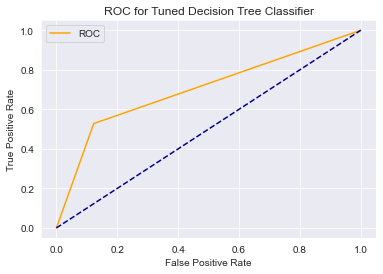

Area under the curve:  0.7026132370021534


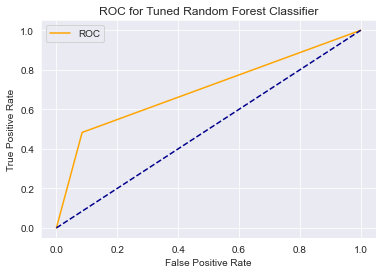

Area under the curve:  0.6992718645365851


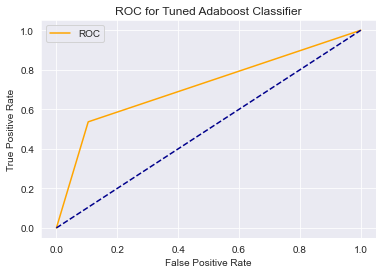

Area under the curve:  0.7161119434746352


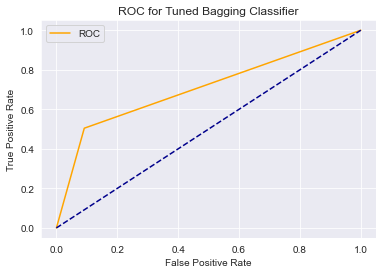

Area under the curve:  0.7064592178397225


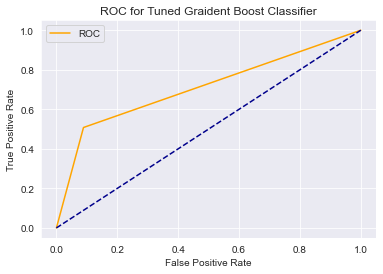

Area under the curve:  0.7095376172565683


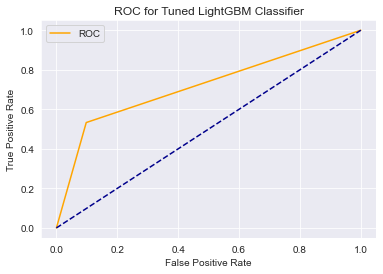

Area under the curve:  0.7175467613369643


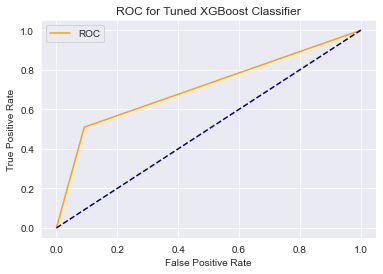

Area under the curve:  0.709142580988202


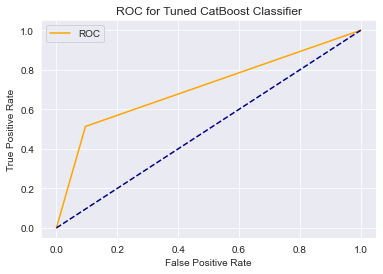

Area under the curve:  0.7089972537770657


In [160]:
# Loading the probability values for positive class
y_prob = TunedTreeR.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr11, tpr11, thresholds = metrics.roc_curve(y_test, prediction_Tunedtree_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve11(fpr11, tpr11)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr11, tpr11))



# Loading the probability values for positive class
y_prob = rf_Tuned.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr12, tpr12, thresholds = metrics.roc_curve(y_test, Pred_rfTuned_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve12(fpr12, tpr12)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr12, tpr12))



# Loading the probability values for positive class
y_prob = Tuned_ada.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr13, tpr13, thresholds = metrics.roc_curve(y_test, Tuned_pred_AB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve13(fpr13, tpr13)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr13, tpr13))



# Loading the probability values for positive class
y_prob = Tuned_bgcl.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr14, tpr14, thresholds = metrics.roc_curve(y_test, Tuned_pred_BG, pos_label=1)
# Plotting the ROC curve
plot_roc_curve14(fpr14, tpr14)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr14, tpr14))



# Loading the probability values for positive class
y_prob = Tuned_gbcl.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr15, tpr15, thresholds = metrics.roc_curve(y_test, Tuned_pred_GB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve15(fpr15, tpr15)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr15, tpr15))



# Loading the probability values for positive class
y_prob = Tuned_clf.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr16, tpr16, thresholds = metrics.roc_curve(y_test, Tuned_pred_LGB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve16(fpr16, tpr16)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr16, tpr16))



# Loading the probability values for positive class
y_prob = Tuned_xgbc.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr17, tpr17, thresholds = metrics.roc_curve(y_test, Tuned_pred_XGB, pos_label=1)
# Plotting the ROC curve
plot_roc_curve17(fpr17, tpr17)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr17, tpr17))



# Loading the probability values for positive class
y_prob = Tuned_cat.predict_proba(X_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr18, tpr18, thresholds = metrics.roc_curve(y_test, Tuned_pred_cat, pos_label=1)
# Plotting the ROC curve
plot_roc_curve18(fpr18, tpr18)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr18, tpr18))

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.3 Confusion Matrix for Tuned Models

Text(0.5, 1.0, 'CatBoost Classifier')

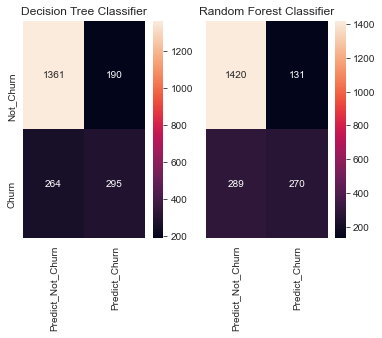

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

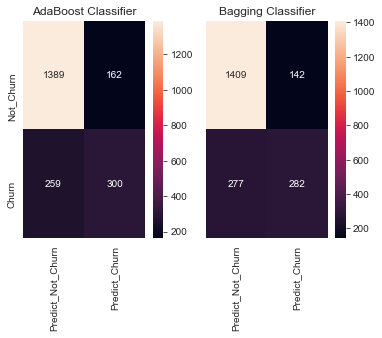

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

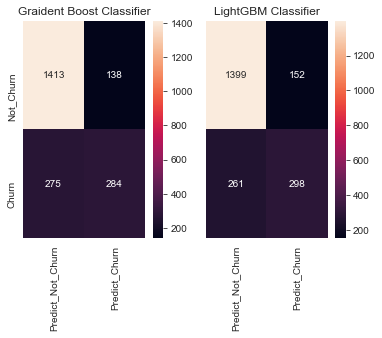

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

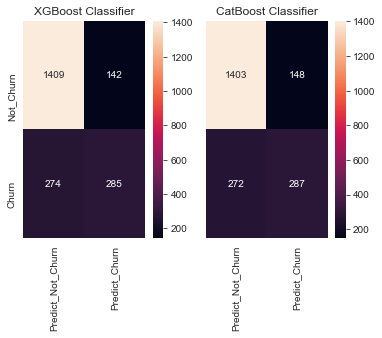

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [161]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

f12,(ax11,ax12) = plt.subplots(1,2,sharey=True)
cm11=metrics.confusion_matrix(y_test, prediction_Tunedtree_test)
df_cm11 = pd.DataFrame(cm11, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7,5))
g11 = sns.heatmap(df_cm11, annot=True, fmt='g', ax=ax11 )
ax11.set_title('Decision Tree Classifier')

cm12=metrics.confusion_matrix(y_test, Pred_rfTuned_test)
df_cm12 = pd.DataFrame(cm12, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7,5))
g12 = sns.heatmap(df_cm12, annot=True, fmt='g', ax=ax12)
ax12.set_title('Random Forest Classifier')



f34,(ax13,ax14) = plt.subplots(1,2,sharey=True)
cm13=metrics.confusion_matrix(y_test, Tuned_pred_AB)
df_cm13 = pd.DataFrame(cm13, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g13 = sns.heatmap(df_cm13, annot=True, fmt='g', ax=ax13)
ax13.set_title('AdaBoost Classifier')

cm14=metrics.confusion_matrix(y_test, Tuned_pred_BG)
df_cm14 = pd.DataFrame(cm14, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g14 = sns.heatmap(df_cm14, annot=True, fmt='g', ax=ax14)
ax14.set_title('Bagging Classifier')



f56,(ax15,ax16) = plt.subplots(1,2,sharey=True)
cm15=metrics.confusion_matrix(y_test, Tuned_pred_GB)
df_cm15 = pd.DataFrame(cm15, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g15 = sns.heatmap(df_cm15, annot=True, fmt='g', ax=ax15)
ax15.set_title('Graident Boost Classifier')

cm16=metrics.confusion_matrix(y_test, Tuned_pred_LGB)
df_cm16 = pd.DataFrame(cm16, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g16 = sns.heatmap(df_cm16, annot=True, fmt='g', ax=ax16)
ax16.set_title('LightGBM Classifier')



f78,(ax17,ax18) = plt.subplots(1,2,sharey=True)
cm17=metrics.confusion_matrix(y_test, Tuned_pred_XGB)
df_cm17 = pd.DataFrame(cm17, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g17 = sns.heatmap(df_cm17, annot=True, fmt='g', ax=ax17)
ax17.set_title('XGBoost Classifier')

cm18=metrics.confusion_matrix(y_test, Tuned_pred_cat)
df_cm18 = pd.DataFrame(cm18, index = [i for i in ["Not_Churn","Churn"]],columns = [i for i in ["Predict_Not_Churn","Predict_Churn"]])
plt.figure(figsize = (7, 5))
g18 = sns.heatmap(df_cm18, annot=True, fmt='g', ax=ax18)
ax18.set_title('CatBoost Classifier')


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.5 Select the final best trained model along with your detailed comments for selecting this model.

<font size="3">• The Classification model selected for this dataset is LightGBM Classification model as it had the highest F1 score and accuracy.</font>
    
<font size="3">• The model was optimized using RandomizedSearchCV hyperparameter tuning which is a library from sklearn that is used for finding the best hyperparameters for the model by cross validation and by manual adjustments.</font>
    
<font size="3">The following is the LightGBM Classification model before and after hyperparameter tuning:</font>
    
<font size="3">**A) Before Hyperparameter Tuning:**</font>
    
<font size="3">  1) Accuracy = 0.798 (79.8%)	</font>

<font size="3">  2) Precision = 0.645 (64.5%)</font>

<font size="3">  3) Recall = 0.527 (52.7%)</font>

<font size="3">  4) F1-Score = 0.580 (58.0%)</font>

<font size="3">  5) Area under the curve value (from ROC) =  0.711 (71.1%)</font>

<font size="3">  6) Confusion matrix = 1684 predicted correctly and 426 predicted incorrectly out of 2110</font>
    
<font size="3">**B) After Hyperparameter Tuning:**</font>
    
<font size="3">  1) Accuracy = 0.802 (80.2%)</font>

<font size="3">  2) Precision = 0.662 (66.2%)</font>

<font size="3">  3) Recall = 0.533 (53.3%)</font>

<font size="3">  4) F1-Score = 0.590 59.0%)</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.717 (71.7%)</font>

<font size="3">  6) Confusion matrix = 1697 predicted correctly and 413 predicted incorrectly out of 2110</font>   


<font size="3">•<b> The Hyperparameters used for LightGBM using RandomizedSearchCV are </b>"feature_fraction", "min_data_in_leaf", "num_leaves", "max_depth", "learning_rate". The hyperparameter values settings were feature_fraction = 1, learning_rate = 0.09, max_depth = 4,min_data_in_leaf = 70, num_leaves =4. The following are the definition of the hyperparameter used for LightGBM:</font>

<font size="3">A) learning_rate : The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.</font>
    
<font size="3">B) max_depth: It specifies the maximum depth to which each tree will be built.</font>
    
<font size="3">C) num_leaves: This is the main parameter to control the complexity of the tree model.</font>

<font size="3">D) min_data_in_leaf:  is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves.</font>

<font size="3">E) feature_fraction: By default, LightGBM considers all features in a Dataset during the training process. This behavior can be changed by setting feature_fraction to a value greater than 0 and less than 1.0. Setting feature_fraction to 0.5, for example, tells LightGBM to randomly select 50% of features at the beginning of constructing each tree. This reduces the total number of splits that have to be evaluated to add each tree node. </font>


<font size="3"><b>The reason why LightGBM is the best Hypertuned Classification model for this dataset is because of the following:</b> </font>
        
<font size="3">1) 0.4% increase in accuracy</font>
    
<font size="3">2) 1.7% increase in Precision</font>
    
<font size="3">3) 0.6% increase in Recall</font>

<font size="3">4) 1% increase in F1-Score</font>

<font size="3">6) 0.6 % increse in AUC (Area under the curve)</font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.6 Pickle the selected model for future use.

In [162]:
import pickle
filename = 'churn_prediction_model_LightGBM'
pickle.dump(Tuned_clf, open(filename,'wb'))

In [163]:
loaded_model = pickle.load(open(filename,'rb'))

<font size="5"><p style="color:black"> <b> 6. Conclusion and improvisation: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">6.1 Write your conclusion on the results.

<font size="3">• The conclusion for the results are as follows:</font>

<font size="3"><b>1) Import and warehouse data:</b>

The conclusion for Import and warehouse data is, datasets were loaded into MySQL database and virtual connection with python is established using the pymysql library. The datasets are then combined with pandas library on index. The "TotalCharges" column/attribute had missing values that were removed while loading the dataset into the MySQL database, this means that part of the data cleansing was already performed.
    
&nbsp;     
The final shape of the dataset is (7032, 21) and there were no missing/duplicate values.
    
<font size="3"><b>2) Data cleansing:</b>
    
"TotalCharges" is converted to a numerical attribute by using to_numeric function. The rest of the categorical attributes are converted to continuous by label encoding and also irrelevant columns were removed using functions for automation.
    
&nbsp;    
<font size="3"><b>3) Data analysis & visualisation:</b></font>
&nbsp;
    
Hypothesis testing is performed to check for insiginificant or highly correlated attributes, "PhoneService" and "gender" were removed as they were unecessary and had very low p-value (<0.05) from the dataset that is used for model building.
&nbsp;
<font size="4"><p style="color:blue"><b>a) Univariate analysis:</b> </p></font>
    
<font size="3">
    
• It is found that the dataset is not normally distributed.

• The Skewness is as follows : Tenure = 0.237 (low positive/right skewness), MonthlyCharges = -0.222 (low negative/left skewness), TotalCharges = 0.96 (high positive/right skewness)
&nbsp;   
   
• The Kurtosis is as Tenure =-1.387 (highly flat peak - has high depression), MonthlyCharges = -1.256(highly flat peak - has high depression), TotalCharges = -0.231 (highly flat peak - has slight depression)
   
•  The following is the interpretation for frequency of occurence:
    
>More number of non senior citizen customers
    
>Majority of customers are financially independent
    
>Majority of customers use the phoneservice, and PaperlessBilling
    
>Majority of customers have internet service and within that, fiberoptic usage is greater than DSL.
    
>Majority of customers dont have multiple lines, online security, online backup and device protection.
    
>Majority of customers dont use TechnicalSupport (only 29% use) and the streaming services for TV and Movies (only 38% use)
    
>Majority of customers have selected the monthly contract as opposed to the one year and two year contracts.
    
>Majority of customers use the non automatic methods of payment as opposed to automatic payment methods. 
    
>Only minority of 26% customers churn

• From outlier screening, it is found that there are no outliers in the dataset.
    
<font size="3"><p style="color:blue"><b>b) Bivariate analysis:</b> </p> 
    
• The following is the interpretation for Churn:
    
>The customers that have longer subscription with service dont churn
    
>The customers that have higher MonthlyCharges churn
    
>The customers that churn have lower TotalCharges
    
<font size="3"><p style="color:blue"><b>c) Multivariate analysis:</b> </p>
&nbsp; 
    
• The following is the interpretation for all features with respect to churn:
    
**Tenure**   
>Senior citizens with longer subscription are more likely to churn
    
>Customers with longer subscription that have partners, phoneservice,dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, One-year or two-year contracts are more likely to churn
   
>Customers with longer subscription that use Customer Support, Streaming services for TV and Movies, Automatic payment methods are more likely to churn
    
**Monthly Charges**    
    
>Senior citizens with higher Monthly Charges are more likely to churn
    
>Customers with higher Monthly Charges that have partners, phoneservice, MultipleLines, InternetService, OnlineBackup, DeviceProtection, One-year or two-year contracts are more likely to churn

>Customers with higher Monthly Charges that use Customer Support, Streaming services for TV and Movies, Automatic payment methods are more likely to churn
    
>Customers with higher Monthly Charges without dependents are more likely to churn

**Total Charges**   
    
>Senior citizens with higher Total Charges aare more likely to churn
    
>Customers with higher Total Charges that have partners, phoneservice, MultipleLines,dependents, InternetService, OnlineBackup, DeviceProtection, One-year or two-year contracts are more likely to churn
    
>Customers with higher Total Charges that use Customer Support, Streaming services for TV and Movies, Automatic payment methods are more likely to churn

    
• From Correlation analysis, it is understood that MonthlyCharges, Paperless billing, and Payment method are positively corrrelated with "Churn" attribute while rest are negatively correlated.
 
<font size="3"><b>4) Data pre-processing: </b></font>
    
• The TotalCharges, MonthlyCharges and Tenure numerical attributes were scaled/normalized with Min-Max scaling method and merged back with the dataset.
    
• Imbalance is checked for the target attribute "Churn" where it is found that it is Mildly imbalanced at 26.6% does require balancing for model building. (Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?).
    
• Dataset is split into train and test at the ratio of 70:30, it has similar statistical characteristics to original dataset.
    
<font size="3"><b>5) Model training, testing and tuning: </b></font>
    
• Model is fitted, trained and tuned with 
    
1) Decision Tree Classifier
2) RandomForestClassifier
3) Adaboost Classifier
4) Bagging Classifier
5) Graident Boost Classifier
6) LightGBM Classifier
7) XGBoost Classifier
8) CatBoost Classifier

• The classification accuracies before hyperparameter tuning are as follows:
    
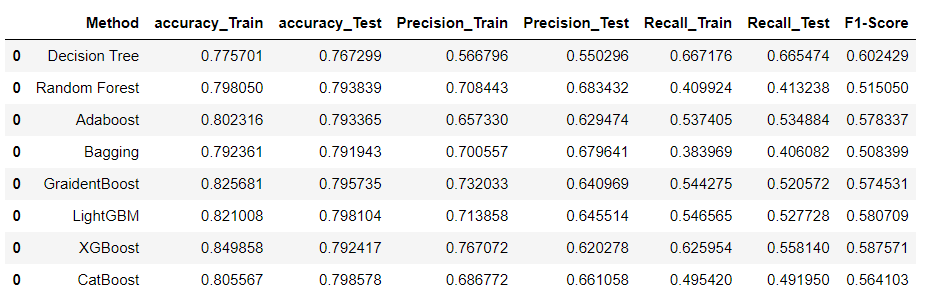
    
• The Model's hyperparameters were tuned for better accuracy and F1-Score, the classification accuracies after tuning are as follows:
    
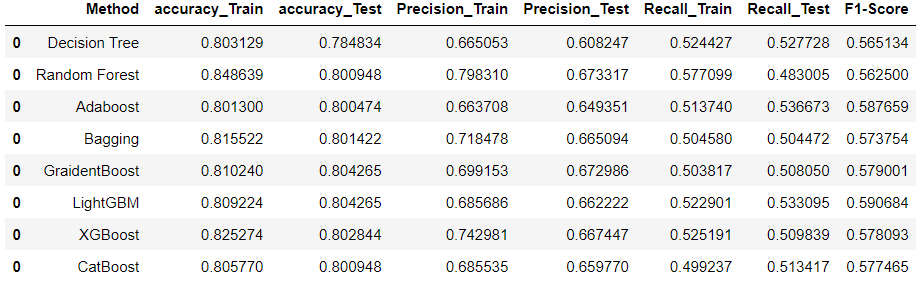
    
• The best trained model is LightGBM, because it has the best accuracy and F1-Score. 
    
Before and After hyperparameter tuning for LightGBM Classification model :
    
<font size="3">**A) Before Hyperparameter Tuning:**</font>
    
<font size="3">  1) Accuracy = 0.798 (79.8%)	</font>

<font size="3">  2) Precision = 0.645 (64.5%)</font>

<font size="3">  3) Recall = 0.527 (52.7%)</font>

<font size="3">  4) F1-Score = 0.580 (58.0%)</font>

<font size="3">  5) Area under the curve value (from ROC) =  0.711 (71.1%)</font>

<font size="3">  6) Confusion matrix = 1684 predicted correctly and 426 predicted incorrectly out of 2110</font>
    
<font size="3">**B) After Hyperparameter Tuning:**</font>
    
<font size="3">  1) Accuracy = 0.802 (80.2%)</font>

<font size="3">  2) Precision = 0.662 (66.2%)</font>

<font size="3">  3) Recall = 0.533 (53.3%)</font>

<font size="3">  4) F1-Score = 0.590 59.0%)</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.717 (71.7%)</font>

<font size="3">  6) Confusion matrix = 1697 predicted correctly and 413 predicted incorrectly out of 2110</font> 
    
<font size="3"><b>The reason why LightGBM is the best Hypertuned Classification model for this dataset is because of the following:</b> </font>
        
<font size="3">1) 0.4% increase in accuracy</font>
    
<font size="3">2) 1.7% increase in Precision</font>
    
<font size="3">3) 0.6% increase in Recall</font>

<font size="3">4) 1% increase in F1-Score</font>

<font size="3">6) 0.6 % increse in AUC (Area under the curve)</font>
    
    
• The LightGBM model is pickled for future use and saved as 'churn_prediction_model_LightGBM'

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">6.2 Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
telecom operator to perform a better data analysis in future.

<font size="4">Two datasets with combined 20 features and 1 target attribute were provided for data analysis and data modelling.</font>
    
<font size="4"><b>A)</b> TelcomCustomer-Churn_1.csv</font>

<font size="4"><b>B)</b> TelcomCustomer-Churn_2.csv </font>
    
<font size="4">The detailed suggestions/improvements on the data points collected by the telecom operator is as follows:
    
<b>1) Quality of the dataset</b>
    
The data collection methods needs to be improved as the data had missing values in the "TotalCharges" column but it was removed during data loading into the MySQL database.
    
<b>a)</b> The quality of the dataset can be improved by collecting information without any missing values or should be complete/comprehensive.
    
<b>b)</b> The consistency of the dataset should be the same and no room for manual errors as that would deviate the interpretation/inference.
    
<b>c)</b> The data should be accurate and should match with the actual observation.
    
<b>d)</b> The dataset had values in the perfect range and there were no outliers, but in a real churn dataset,it would definitely have outlier values. So, this could mean that the data could be altered, however, the alteration could result in deviation from the True observation. 
    
<b>f)</b> The timeframe for recording the data can be given which will give a point of reference and more inference can be drawn from that.
    
</font>

<font size="4"><b> 2) Quantity of the dataset</b>

•In Data Collection, the quantity of the data is looked at as the most important factor as the more the quantity of the data, the more information that can be interpreted. More the number of attributes, more the impact on the model prediction. However, the quantity should not have same ratio or duplicate values to the other attributes as this would result in columns with high correlation, that wont be useful in model building.
    
•The quantity is important but if the data is inaccurate then the whole data analysis process would result in a waste of time. Hence, the priority should be to obtain consistent data regardless of quantity. However,  more the quantity, better the model</font>

<font size="4"><b> 3) Variety of the dataset</b>
    
•The dataset had 20 features with which we had to predict the target attribute. In this case, the target attribute 'Churn' was mildly imbalanced and was in the ratio 70:30, here, imbalance is not very high so it wont affect model building.
    
•It can be improved with more number of features with lower correlation with other features. This would result in giving better predictive outputs with higher accuracy. </font>

<font size="4"><b> 4) Velocity of the dataset</b> 

The datasets in this project is a high velocity dataset because it has 7032 rows and 21 columns/attributes and the size of the data was about 147672. However, the high velocity datasets are not always the best, even though the data is automated, small errors or deviations can lead to predicting a completely different result. Thats why when collecting the data using high throughput systems, the dataset needs to be screened once on whether any incorrect / missing values / duplicate values are present. </font>

<font size="4"><b> 5) Veracity of the dataset</b> 
    
•The veracity is an important aspect in the dataset which addresses Quality, quanity, variety and velocity of the data. The veracity is the accuracy of the data, where the information should make sense and should be able to give expected results. The main purpose of veracity is the analysis of dataset before submitting it, it is checked on whether the data has missing, duplicates, null, irrelevant values and filtered out. 
    
•The accuracy of the dataset can be predicted using Machine Learning Algorithms, the accuracy would be prediction of a target class and this prediction would help understand hidden patterns for the dataset. However, there are limitations to this as well, if the data or input information is inaccurate, the output accuracy would not matter at all. This could be very expensive in case it is part of business requirements.

<font size="4"><p style="color:green"> The above points are both the improvements as well as the ideal ways for data processing, which is an essential part of data analysis and data modelling </font>